# Introduction to RDKit - Part II

V.F. Scalfani, University of Alabama Libraries

Fall 2024

## Anticipated Length of Workshop

**Part I**

1 hour

**Part II**

1 hour

## What is the purpose of this workshop?

This workshop is designed to introduce attendees to introductory cheminformatics techniques using RDKit (https://www.rdkit.org/). RDKit is a popular C++/Python Cheminformatics toolkit. While Part I and II of this RDKit workshop can certainly be a stand alone series, we hope you will join us for the series of computer-assisted retrosynthesis workshops, where we will continue using RDKit.

Here is what we will cover below. The code content is split into two Jupyter Notebooks:

**Part I Notebook**

1. SMILES file format
2. Reading and working with molecules
3. Molecule depiction
4. Canonicalization, identifiers, and hashes
5. Chemical similarity and fingerprints
6. Substructure search

**Part 2 Notebook**

7. Descriptors
8. Reading and working with reactions
9. Reaction depiction
10. Reaction transformations
11. Molecule and reaction standardization

## Additional Resources

For additional information about RDKit and its functionality, see:

* https://www.rdkit.org/docs/index.html
* https://github.com/PatWalters/practical_cheminformatics_tutorials
* https://schwallergroup.github.io/ai4chem_course/

In [1]:
# Before we begin, make sure your rdkit installation is working correctly
# this should print an RDKit version without error
from rdkit import rdBase
print('RDKit version:',rdBase.rdkitVersion)

RDKit version: 2024.03.4


## 7. Descriptors

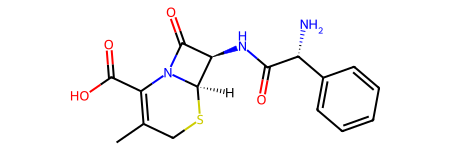

In [2]:
# https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# CID: 27447
mol = Chem.MolFromSmiles('CC1=C(N2[C@@H]([C@@H](C2=O)NC(=O)[C@@H](C3=CC=CC=C3)N)SC1)C(=O)O')
mol

In [3]:
# https://www.rdkit.org/docs/GettingStartedInPython.html
# We can get a dictionary of all descriptors like this:
vals = Descriptors.CalcMolDescriptors(mol)
vals

[08:37:55] DEPRECATION WARNING: please use MorganGenerator
[08:37:55] DEPRECATION WARNING: please use MorganGenerator
[08:37:55] DEPRECATION WARNING: please use MorganGenerator


{'MaxAbsEStateIndex': 12.310561854371379,
 'MaxEStateIndex': 12.310561854371379,
 'MinAbsEStateIndex': 0.015376687839711245,
 'MinEStateIndex': -1.1278578929020846,
 'qed': 0.6816125812503079,
 'SPS': 24.083333333333332,
 'MolWt': 347.39600000000013,
 'HeavyAtomMolWt': 330.26000000000005,
 'ExactMolWt': 347.09397702399997,
 'NumValenceElectrons': 126,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.35211488068006896,
 'MinPartialCharge': -0.4765611911664806,
 'MaxAbsPartialCharge': 0.4765611911664806,
 'MinAbsPartialCharge': 0.35211488068006896,
 'FpDensityMorgan1': 1.375,
 'FpDensityMorgan2': 2.0416666666666665,
 'FpDensityMorgan3': 2.6666666666666665,
 'BCUT2D_MWHI': 32.16663676633533,
 'BCUT2D_MWLOW': 10.012944121352337,
 'BCUT2D_CHGHI': 2.534274196620412,
 'BCUT2D_CHGLO': -2.489529772779682,
 'BCUT2D_LOGPHI': 2.397054901968529,
 'BCUT2D_LOGPLOW': -2.7053832344612534,
 'BCUT2D_MRHI': 7.998327495054558,
 'BCUT2D_MRLOW': -0.15044404644092088,
 'AvgIpc': 2.5850858589969508,
 'Balaban

In [4]:
vals['RingCount']

3

In [5]:
# If you don't need to compute everything, you can also compute individual values:
mol_wt = Descriptors.MolWt(mol)
mol_wt

347.39600000000013

In [6]:
# And here is an example of computing desciptors from a SMILES file:
with Chem.SmilesMolSupplier('../X_Data/test_smiles.smi',titleLine=False, delimiter='\t',nameColumn=1) as suppl:
    for mol in suppl:
        if mol is not None:
            print(str(Descriptors.RingCount(mol)) + '  ' + str(mol.GetProp('_Name')))

6  146758
5  10089772
4  10017963
5  10247811
5  10091548
5  148756


It's also fairly starightforward to combine descriptor calculations with Pandas dataframes: https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html

## 8. Reading and working with reactions

`rdChemReactions` module: https://www.rdkit.org/docs/source/rdkit.Chem.rdChemReactions.html#

In [7]:
# Example rxn from: https://doi.org/10.1021/ol400578c
# I used RXNMapper to map the reaction atoms: https://github.com/rxn4chemistry/rxnmapper
from rdkit.Chem import rdChemReactions
rxn = rdChemReactions.ReactionFromSmarts(r'[O:1]=[N+:2]([O-:3])[CH3:4].[CH:5](=[O:6])[CH2:7][CH2:8][c:9]1[cH:10]'
                                         r'[cH:11][cH:12][cH:13][cH:14]1>F[K]>[O:1]=[N+:2]([O-:3])[CH2:4][CH:5]'
                                         r'([OH:6])[CH2:7][CH2:8][c:9]1[cH:10][cH:11][cH:12][cH:13][cH:14]1', useSmiles=True)
# When reading in a defined rxn as SMILES, it's probably not necassary to sanitize, but it won't hurt
# So I like the idea of sanitizing the rxn before doing anything, see https://github.com/rdkit/rdkit/discussions/7067
# returns SANITIZE.NONE after sanitized and valid
rdChemReactions.SanitizeRxn(rxn)

rdkit.Chem.rdChemReactions.SanitizeFlags.SANITIZE_NONE

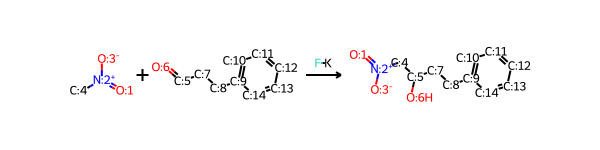

In [8]:
# Similar to viewing mols, if you want a quick visualization, you can display rxns within jupyter notebooks
rxn

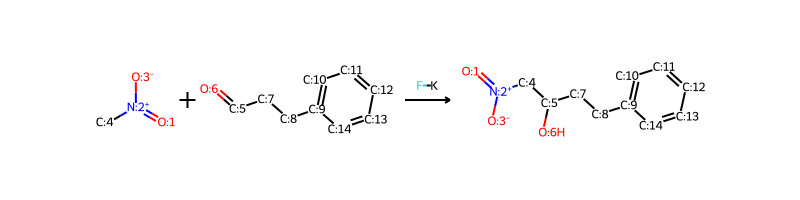

In [9]:
# There are also some useful options within the IPythonConsole
IPythonConsole.molSize = (600,200)
rxn

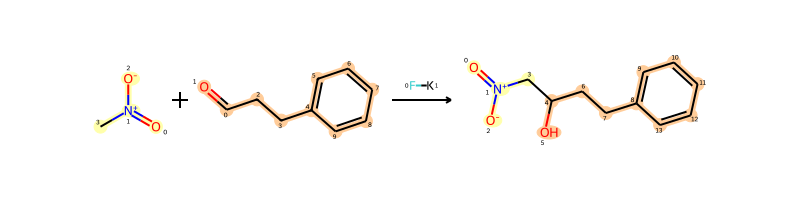

In [10]:
# And a few more
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.highlightByReactant = True
rxn

In [11]:
# Get the reacting atoms from rxn
# returns sequences of reactant atoms that change in rxn
rxn.Initialize()
rxn.GetReactingAtoms()

((3,), (0, 1))

In [12]:
IPythonConsole.molSize = (300,250)
# Get products
products = rxn.GetProducts()
print(len(products))

1


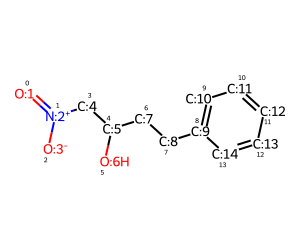

In [13]:
products[0]

In [14]:
# Get agents
agents = rxn.GetAgents()
len(agents)

1

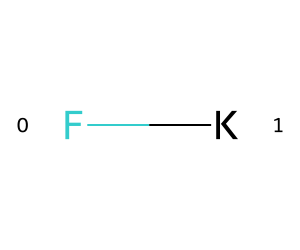

In [15]:
agents[0]

In [16]:
# Get reactants
reactants = rxn.GetReactants()
len(reactants)

2

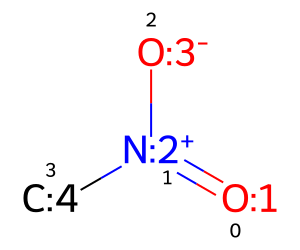

In [17]:
reactants[0]

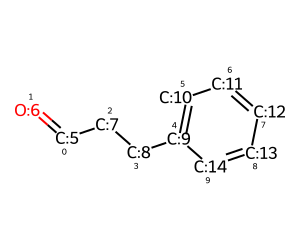

In [18]:
reactants[1]

Components of rxns are not necessarily automatically sanitized by default (e.g., as opposed to when creating mols from SMILES), so it's a good idea to sanitize any reactants/products if you plan to run downstream computations on them:

In [19]:
mol = reactants[1]
# returns SANITIZE.NONE after sanitized and valid
Chem.SanitizeMol(mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

We can load in a set of reactions by creating a list or dictionary. As far as I am aware, there is not a supplier for reactions like there is for molecules.

In [20]:
# We will use a the dataset, rxns_10.rsmi
# This dataset is a random sample of 10 from the 1976_Sep2016_USPTOgrants_smiles.rsmi dataset: 
# https://figshare.com/articles/dataset/Chemical_reactions_from_US_patents_1976-Sep2016_/5104873

import csv
rxn_data_dict = {}
col_names = ['reaction_smiles', 'PatentNumber', 'ParagraphNum', 'Year', 'TextMinedYield', 'CalculatedYield']
with open('../X_Data/rxns_10.rsmi', 'r') as infile:
    reader = csv.DictReader(infile, delimiter='\t', fieldnames=col_names)
    for idx,row in enumerate(reader):
        rxn_data_dict[idx] = row

In [21]:
rxn_data_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
rxn_data_dict[0]

{'reaction_smiles': '[NH2:1][C:2]1[C:7]([O:8]C)=[CH:6][C:5]([Cl:10])=[CH:4][C:3]=1[C:11](=[O:16])[C:12]([F:15])([F:14])[F:13].B(Br)(Br)Br.O>C(Cl)Cl>[NH2:1][C:2]1[C:7]([OH:8])=[CH:6][C:5]([Cl:10])=[CH:4][C:3]=1[C:11](=[O:16])[C:12]([F:15])([F:13])[F:14]',
 'PatentNumber': 'US06140499',
 'ParagraphNum': '',
 'Year': '2000',
 'TextMinedYield': '100%',
 'CalculatedYield': '102.1%'}

In [23]:
IPythonConsole.molSize = (600,250)
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.highlightByReactant = True

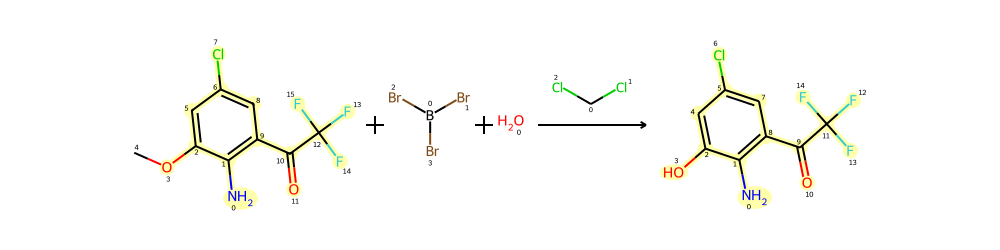

In [24]:
# look at first one
rxn = rdChemReactions.ReactionFromSmarts(rxn_data_dict[0]['reaction_smiles'], useSmiles=True)
rxn

In [25]:
# And we can loop through the dictionary and do something
# Like print a list of all products as SMILES

for key,value in rxn_data_dict.items():
    rxn = rdChemReactions.ReactionFromSmarts(value['reaction_smiles'], useSmiles=True)
    products = rxn.GetProducts()
    for idx in range(len(products)):
        mol = products[idx]
        Chem.SanitizeMol(mol) # don't forget this step with rxn mols
        print(key, Chem.MolToSmiles(mol))

0 [NH2:1][c:2]1[c:3]([C:11]([C:12]([F:13])([F:14])[F:15])=[O:16])[cH:4][c:5]([Cl:10])[cH:6][c:7]1[OH:8]
1 [Cl:1][c:2]1[cH:3][cH:4][c:5]2[c:6](-[c:11]3[n:12][c:13]4[c:14]([n:15][cH:16]3)[nH:17][cH:18][c:19]4[C:20](=[O:21])[NH:22][CH:23]([CH3:24])[CH3:25])[n:7][nH:8][c:9]2[cH:10]1
2 [N+:6](=[O:7])([O-:9])[c:14]1[c:13]([OH:18])[c:12]([Br:11])[cH:17][cH:16][cH:15]1
3 [ClH:37]
3 [Si:8]([CH3:9])([CH3:10])([C:11]([CH3:12])([CH3:13])[CH3:14])[O:15][C@@H:16]1[CH2:17][CH:18]([c:28]2[c:29]([F:35])[cH:30][cH:31][c:32]([F:34])[cH:33]2)[NH:19][CH2:20]1
4 [Cl:4][c:5]1[c:6]([Cl:21])[c:7]([CH:19]=[O:20])[cH:8][c:9]2[c:13]1[O:12][CH:11]([C:14](=[O:15])[O-:16])[O:10]2
4 [Li+:3]
5 [CH:3]([CH3:4])([OH:5])[c:6]1[c:7]([O:26][CH3:27])[c:8](-[c:15]2[cH:16][cH:17][c:18]([C:21](=[O:22])[N:23]([CH3:24])[CH3:25])[n:19][cH:20]2)[c:9]([C:13]#[N:14])[c:10]([Cl:12])[cH:11]1
6 [ClH:30]
6 [NH:5]1[CH2:6][CH:7]2[c:8]3[cH:9][c:10]4[c:11]([cH:12][c:13]3[CH:14]([CH2:15]1)[CH2:16]2)[o:17][c:28]([CH2:27][c:21]1[cH:22][cH:23][c

## 9. Reaction Depiction

We can use the `rdMolDraw2D` module to depict reactions.

In [26]:
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True) # may not work for some rxn components like [H][H]

# png function to view images
def show_png(drawing_text):

    # not sure why, but re-importing PIL
    # each time is necassary in Jupyter
    from PIL import Image
    import io
 
    bio = io.BytesIO(drawing_text)
    img = Image.open(bio)
    return img

In [27]:
# create a function to draw rxn
def draw_reaction_light(rxn, width=900, height=250, highlight_option=False):
    drawer = rdMolDraw2D.MolDraw2DCairo(width,height)
    drawer.drawOptions().addStereoAnnotation = False
    drawer.DrawReaction(rxn, highlightByReactant=highlight_option)
    drawer.FinishDrawing()
    rxn_png = drawer.GetDrawingText()
    return rxn_png

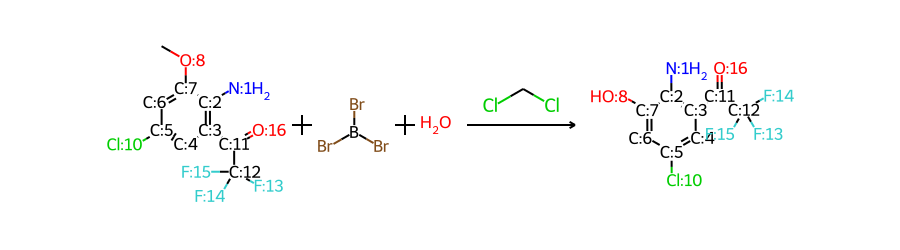

In [28]:
# Default with atom map information
rxn = rdChemReactions.ReactionFromSmarts(rxn_data_dict[0]['reaction_smiles'], useSmiles=True)
show_png(draw_reaction_light(rxn))

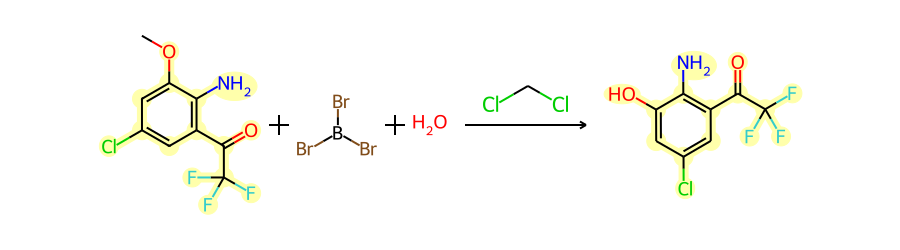

In [29]:
# alternative with highlight by reactant
show_png(draw_reaction_light(rxn, highlight_option=True))

In [30]:
# Dark mode is nice if you are in vscode
def draw_reaction_dark(rxn):
    drawer = rdMolDraw2D.MolDraw2DCairo(900,250)
    drawer.drawOptions().clearBackground = False
    rdMolDraw2D.SetDarkMode(drawer)
    drawer.DrawReaction(rxn)
    drawer.FinishDrawing()
    rxn_png = drawer.GetDrawingText()
    return rxn_png

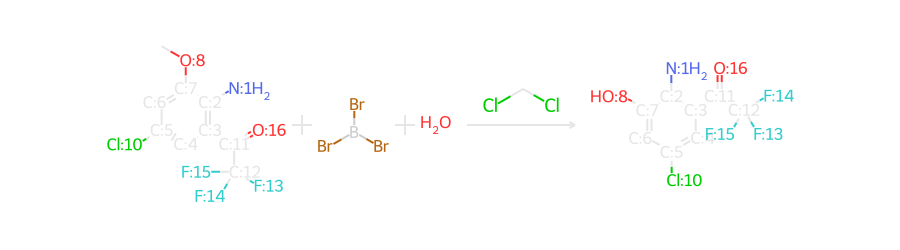

In [31]:
show_png(draw_reaction_dark(rxn))

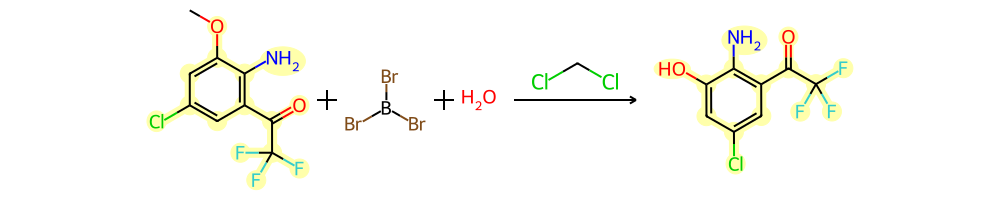

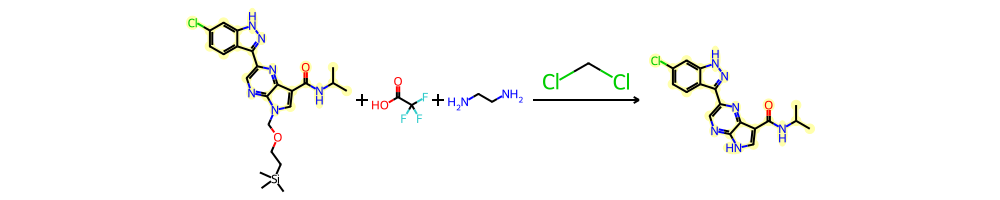

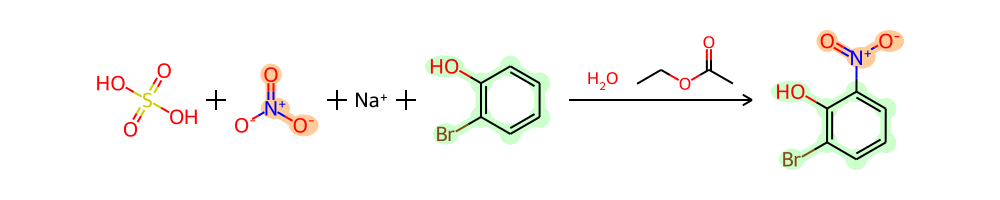

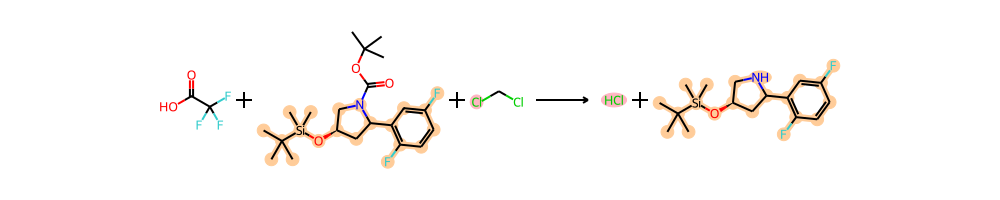

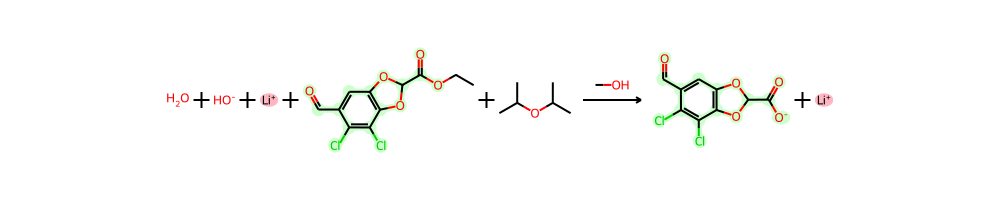

In [32]:
# We can display reactions in a loop, using display
for key,value in rxn_data_dict.items():
    rxn = rdChemReactions.ReactionFromSmarts(value['reaction_smiles'], useSmiles=True)
    if key < 5:  # just do the first 5
       display(show_png(draw_reaction_light(rxn,1000,200,highlight_option=True)))

In [33]:
# Reset some console options for later
IPythonConsole.molSize = (500,200)
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.highlightByReactant = False

## 10. Reaction Transformations

In the previous section, we worked with "real" defined reactions (no ambiguity or patterns). Instead of defining the specific reaction, we can model a reaction with a generic transformation. Daylight introduced this concept as SMIRKS (https://www.daylight.com/dayhtml/doc/theory/theory.smirks.html). RDKit calls reaction transformations **"Reaction SMARTS"**. See below for more information:

https://www.rdkit.org/docs/RDKit_Book.html#reaction-smarts

http://efficientbits.blogspot.com/2018/04/rdkit-reaction-smarts.html

To further confuse the terminology, these transformations are often called templates in computer assisted retrosynthesis. 

In [34]:
# Here is an example Reaction SMARTS adapted from:
# https://github.com/rdkit/rdkit-tutorials/blob/master/notebooks/003_SMARTS_ReactionsExamples.ipynb

# This is a Reaction SMARTS for the oxidation of primary and secondary alaphatic
# alchohols to keytones
rxn = rdChemReactions.ReactionFromSmarts('[C!H0:1]-[O:2]>>[C:1]=[O:2]') # pattern not thoroughly tested
rdChemReactions.SanitizeRxn(rxn)
rxn.GetNumProductTemplates()

1

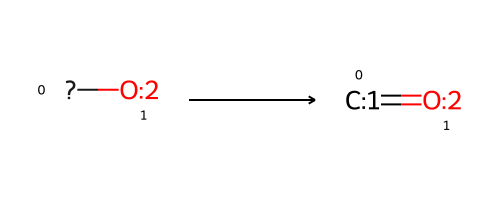

In [35]:
rxn

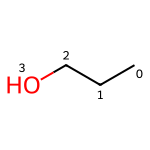

In [36]:
# Let's try a simple primary alcohol as the reactant
r1 = Chem.MolFromSmiles('CCCO')
IPythonConsole.molSize = (150,150)
r1

In [37]:
# now run the reaction
product_tuples = rxn.RunReactants((r1,)) # need to input reactants as tuples (in this case, only 1)
len(product_tuples)

1

In [38]:
product_tuples

((<rdkit.Chem.rdchem.Mol at 0x780a16c2f0d0>,),)

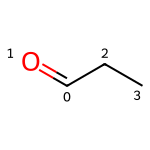

In [39]:
product = product_tuples[0][0]
Chem.SanitizeMol(product)
product

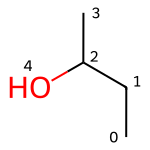

In [40]:
# try with a secondary alcohol
r2 = Chem.MolFromSmiles('CCC(C)O')
r2

In [41]:
# now run the reaction
product_tuples = rxn.RunReactants((r2,)) # need to input reactants as tuples
len(product_tuples)

1

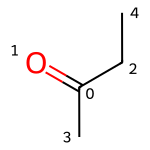

In [42]:
product = product_tuples[0][0]
Chem.SanitizeMol(product)
product

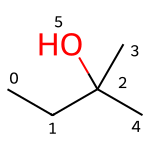

In [43]:
# Try with a teriary alcohol (it should not do anything)
r3 = Chem.MolFromSmiles('CCC(C)(C)O')
r3

In [44]:
# now run the reaction
product_tuples = rxn.RunReactants((r3,)) # need to input reactants as tuples
len(product_tuples)

0

In [45]:
# Okay, how about with a primary and secondary alcohol
r4 = Chem.MolFromSmiles('CC(O)CCO')
product_tuples = rxn.RunReactants((r4,)) # need to input reactants as tuples
len(product_tuples)

2

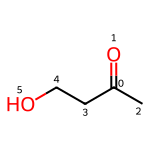

In [46]:
product1 = product_tuples[0][0]
Chem.SanitizeMol(product1)
product1

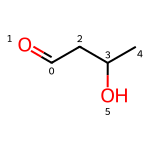

In [47]:
product2 = product_tuples[1][0]
Chem.SanitizeMol(product2)
product2

In [48]:
# We can run reactions in a loop as well
# Adapated from: https://github.com/rdkit/rdkit-tutorials/blob/master/notebooks/003_SMARTS_ReactionsExamples.ipynb
smis = ['CCO', 'CC(C)O', 'c1cccc(O)c1', 'C(C)(C)(C)O', 'CC(C)C(O)C(O)CO', 'OC1CCCCC1']
reactants = [Chem.MolFromSmiles(smi) for smi in smis]
# add an index
reactants = [(idx, reactant) for idx, reactant in enumerate(reactants)]
reactants

[(0, <rdkit.Chem.rdchem.Mol at 0x780a16c2ff40>),
 (1, <rdkit.Chem.rdchem.Mol at 0x780a16c2fc30>),
 (2, <rdkit.Chem.rdchem.Mol at 0x780a16c2fd80>),
 (3, <rdkit.Chem.rdchem.Mol at 0x780a0ea1c740>),
 (4, <rdkit.Chem.rdchem.Mol at 0x780a0ea1c0b0>),
 (5, <rdkit.Chem.rdchem.Mol at 0x780a0ea1c120>)]

In [49]:
# same function we have seen to setup a grid for depiction
def setup_grid(mols, num_molsPerRow=3, panel_size=250):
    molsPerRow = num_molsPerRow
    nRows = len(mols)//molsPerRow
    if len(mols)%molsPerRow:
       nRows+=1
    panelx = panel_size
    panely = panel_size
    canvasx = panelx * molsPerRow
    canvasy = panely * nRows
    drawer_grid = rdMolDraw2D.MolDraw2DCairo(canvasx,canvasy,panelx,panely)
    return drawer_grid

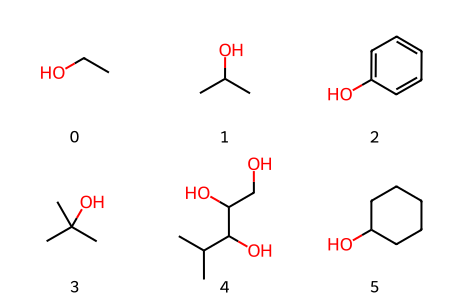

In [50]:
# setup the grid canvas
labels, mols = zip(*reactants)
labels_str = tuple(str(idx) for idx in labels)
drawer = setup_grid(mols, num_molsPerRow=3, panel_size=150)

# draw mols
drawer.DrawMolecules(mols, legends=labels_str)
drawer.FinishDrawing()
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

In [51]:
products = []
for idx, mol in reactants:
    reaction_products = rxn.RunReactants((mol, ))
    products.append((idx,reaction_products))

In [52]:
products

[(0, ((<rdkit.Chem.rdchem.Mol at 0x780a16c2d0e0>,),)),
 (1, ((<rdkit.Chem.rdchem.Mol at 0x780a16c2d1c0>,),)),
 (2, ()),
 (3, ()),
 (4,
  ((<rdkit.Chem.rdchem.Mol at 0x780a0ea1c4a0>,),
   (<rdkit.Chem.rdchem.Mol at 0x780a0ea1c2e0>,),
   (<rdkit.Chem.rdchem.Mol at 0x780a0ea1c510>,))),
 (5, ((<rdkit.Chem.rdchem.Mol at 0x780a0ea1c190>,),))]

In [53]:
# We can flatten this a bit
from itertools import chain
flattened_products = []
for idx, product in products:
    product_mols = list(chain.from_iterable(product))
    # remove entries where there are no products
    if len(product_mols) > 0:
       for mol in product_mols:
           flattened_products.append((idx, mol))
flattened_products

[(0, <rdkit.Chem.rdchem.Mol at 0x780a16c2d0e0>),
 (1, <rdkit.Chem.rdchem.Mol at 0x780a16c2d1c0>),
 (4, <rdkit.Chem.rdchem.Mol at 0x780a0ea1c4a0>),
 (4, <rdkit.Chem.rdchem.Mol at 0x780a0ea1c2e0>),
 (4, <rdkit.Chem.rdchem.Mol at 0x780a0ea1c510>),
 (5, <rdkit.Chem.rdchem.Mol at 0x780a0ea1c190>)]

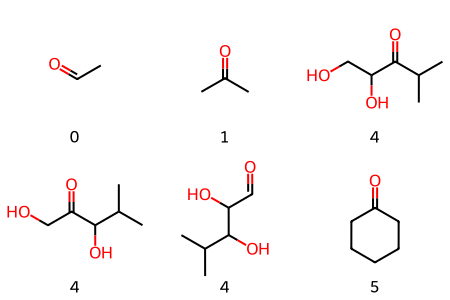

In [54]:
# setup the grid canvas
labels, mols = zip(*flattened_products)
labels_str = tuple(str(idx) for idx in labels)
drawer = setup_grid(mols, num_molsPerRow=3, panel_size=150)

# draw mols
drawer.DrawMolecules(mols, legends=labels_str)
drawer.FinishDrawing()
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

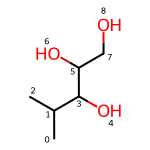

In [55]:
# Obvious question is what if we want to convert all OH to ketones in example 4?
reactants[4][1]

In [56]:
# I don't think there is a built-in function to apply all matches of a reaction
# pattern at the same time, but we can apply the transformation n number of matches
reactant = reactants[4][1]
matches = reactant.GetSubstructMatches(Chem.MolFromSmarts('[C!H0]-[O]'))
matches

((3, 4), (5, 6), (7, 8))

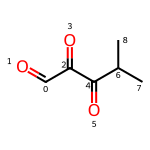

In [57]:
reactant_copy = Chem.Mol(reactant)
matches = reactant_copy.GetSubstructMatches(Chem.MolFromSmarts('[C!H0]-[O]'))
for idx, match in enumerate(matches):
    reaction_product = rxn.RunReactants((reactant_copy,))
    if reaction_product:
        reactant_copy = reaction_product[0][0]  # Assuming single product
        # Sanitize the molecule
        Chem.SanitizeMol(reactant_copy)
    else:
        # If the reaction could not be applied, break out of the loop
        break

final_product = reactant_copy
final_product

In [58]:
# Let's look at one more example, but now with two reactant inputs
# Adapted from: https://github.com/greglandrum/AIDD_RDKit_Tutorial_2021/blob/main/RDKit_Intro.ipynb
amines_smi = ['CCOC(=O)C1=C(N)SC=C1C1CC1','NC1=NN2C(=N1)N=C(C=C2C(F)(F)F)C1=CC=CC=C1','N[C@H](CO)[C@H](O)C1=CC=C(C=C1)[N+]([O-])=O']
acids_smi = ['OC(=O)C1=C(O)C=CC=C1','C[C@H]1C[C@@H](C)CN(C1)S(=O)(=O)C1=CC=C(Cl)C(=C1)C(O)=O','OC(=O)C1=CC(O)=C(O)C=C1']
amines = [Chem.MolFromSmiles(smi) for smi in amines_smi]
acids = [Chem.MolFromSmiles(smi) for smi in acids_smi]

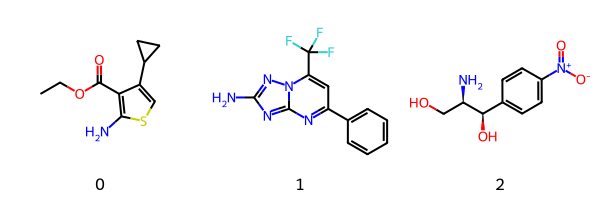

In [59]:
# View amines
# setup the grid canvas
drawer = setup_grid(amines, num_molsPerRow=3, panel_size=200)

# draw mols
drawer.DrawMolecules(amines, legends=[str(idx) for idx in range(len(amines))])
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

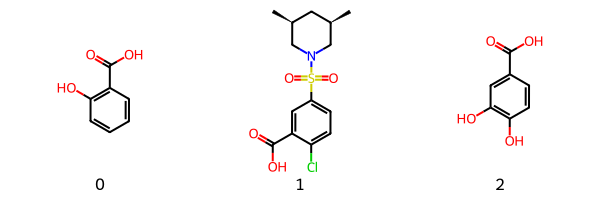

In [60]:
# View acids
# setup the grid canvas
drawer = setup_grid(acids, num_molsPerRow=3, panel_size=200)

# draw mols
drawer.DrawMolecules(acids, legends=[str(idx) for idx in range(len(acids))])
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

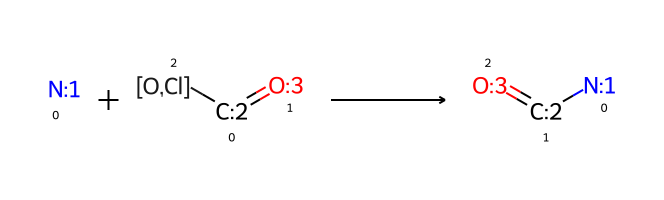

In [61]:
IPythonConsole.molSize = (500,200)
# reaction betwwen a primary amine and carboxylic acid to form an amide
reaction = rdChemReactions.ReactionFromSmarts('[NH2:1].[C:2](=[O:3])-[O,Cl]>>[N:1]-[C:2]=[O:3]')
rdChemReactions.SanitizeRxn(rxn)
reaction

In [62]:
# run the reaction on all combinations of amines and acids
# Add idxs to track the combinations

import itertools
# generate all possible pairs and add an index
all_pairs = itertools.product(enumerate(amines),enumerate(acids)) 
rxn_mols = []
for (idx_amine,amine),(idx_acid,acid) in all_pairs:
    rxn_products = reaction.RunReactants((amine,acid))
    if not rxn_products:
        continue
    product = rxn_products[0][0]
    Chem.SanitizeMol(product)
    rxn_mols.append(((idx_amine,idx_acid),product))

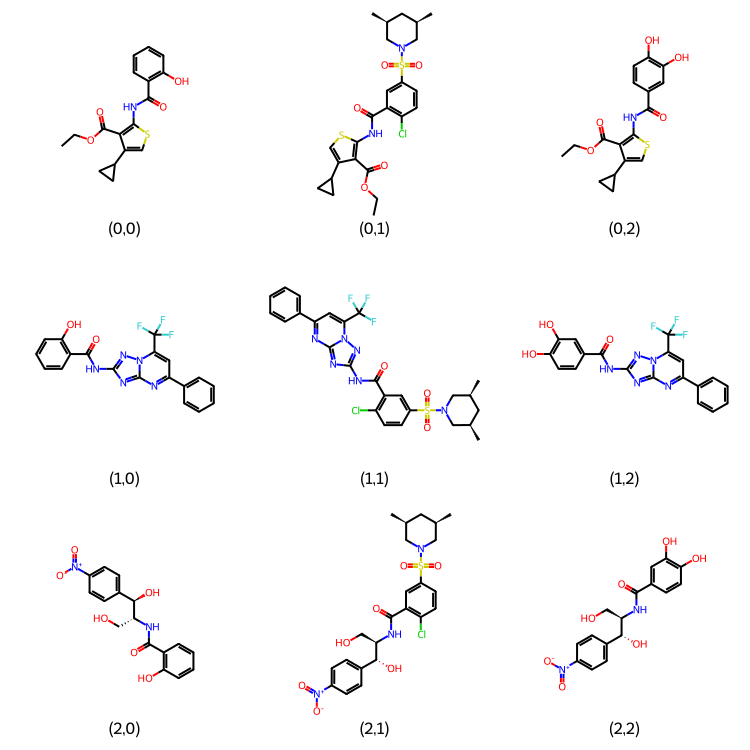

In [63]:
# View products
# setup the grid canvas
idxs,mols = zip(*rxn_mols)
labels = [f"({idx_amine},{idx_acid})" for idx_amine, idx_acid in idxs]
drawer = setup_grid(mols, num_molsPerRow=3, panel_size=250)

# draw mols
drawer.DrawMolecules(mols,legends=labels)
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

## 11. Molecule and reaction standardization

For any cheminformatics workflow, it's generally necassary to perform some type of dataset curation which includes validation and standardization. Here are some examples (Landrum, G., see RSC OpenScience Standardization ref below):

1. Molecule validation - check for allowed valence, incorrect atom symbols, bad aromatic systems

2. Molecule standardization - normalize functional groups, remove ambiguous chirality flags, neutralize molecules, remove salts

Another component of dataset curation would be filtering unwanted molecules:

3. Molecule Filtering - removal of duplicates, removal of compounds with isotopes, removal of compounds containing certain substructures, etc.

The specific steps of validation and standarization will depend on what you are trying to accomplish with downstream calculations. A good starting point would be to read the primary literature for related topics to see what curation steps were taken for your use-case.

Here are some key general references on molecule and reaction standardization:

* Fourches, D.; Muratov, E.; Tropsha, A. Trust, But Verify: On the Importance of Chemical Structure Curation in Cheminformatics and QSAR Modeling Research. J. Chem. Inf. Model. 2010, 50 (7), 1189–1204. https://doi.org/10.1021/ci100176x.
* Fourches, D.; Muratov, E.; Tropsha, A. Trust, but Verify II: A Practical Guide to Chemogenomics Data Curation. J. Chem. Inf. Model. 2016, 56 (7), 1243–1252. https://doi.org/10.1021/acs.jcim.6b00129.
* Gimadiev, T. R.; Lin, A.; Afonina, V. A.; Batyrshin, D.; Nugmanov, R. I.; Akhmetshin, T.; Sidorov, P.; Duybankova, N.; Verhoeven, J.; Wegner, J.; Ceulemans, H.; Gedich, A.; Madzhidov, T. I.; Varnek, A. Reaction Data Curation I: Chemical Structures and Transformations Standardization. Mol. Inf. 2021, 40 (12), 2100119. https://doi.org/10.1002/minf.202100119.
* Landrum, G. https://github.com/greglandrum/RSC_OpenScience_Standardization_202104

We will review **a few examples** of how you could implement standardization/curation steps for molecules and reactions.... See the references for more considerations. 

### Default Molecule Validation and Standarization w/ RDKit

By default, RDKit performs some basic validation and standardization steps, this is referred to as "Molecular Sanitization": https://www.rdkit.org/docs/RDKit_Book.html#molecular-sanitization

Some of the steps include checking for allowed valence, kekulization of aromatic rings, removal of ambiguous chirality, and clean up functional groups such as neutral 5 valent Nitrogen to the zwitterionic form. In general, you probably want to leave the defualt sanitization on.

Here are a few examples taken from: https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/Standardization%20and%20Validation%20with%20the%20RDKit.ipynb

In [64]:
# bad valence
mol = Chem.MolFromSmiles('CO(C)C')

[08:37:56] Explicit valence for atom # 1 O, 3, is greater than permitted


In [65]:
# if sanitization fails, mol == None
mol == None

True

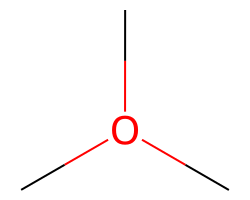

In [66]:
IPythonConsole.molSize = (250,200)
IPythonConsole.drawOptions.addAtomIndices = False
mol = Chem.MolFromSmiles('CO(C)C', sanitize=False)
mol

In [67]:
# bad aromatic system that cannot be kekulized
mol = Chem.MolFromSmiles('c1cc(C)nn1')

[08:37:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5


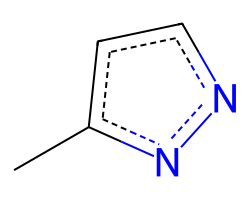

In [68]:
mol = Chem.MolFromSmiles('c1cc(C)nn1', sanitize = None)
mol

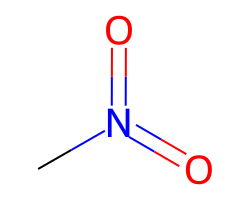

In [69]:
# standardize functional group
mol = Chem.MolFromSmiles('CN(=O)=O', sanitize=None)
mol

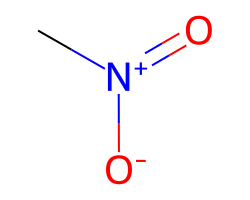

In [70]:
mol = Chem.MolFromSmiles('CN(=O)=O')
mol

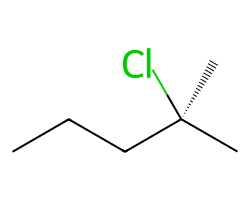

In [71]:
# remove invalid stereochemistry
mol = Chem.MolFromSmiles('CCC[C@](C)(C)Cl', sanitize=None)
mol


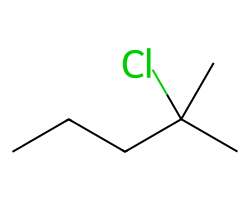

In [72]:
# remove invalid stereochemistry
mol = Chem.MolFromSmiles('CCC[C@](C)(C)Cl')
mol

In [73]:
# It's also possible to customize RDKit sanitization (i.e., do a partial sanitization)
# example adapted from cookbook: https://www.rdkit.org/docs/Cookbook.html#explicit-valence-error-partial-sanitization
# CAS# 18460-59-8
mol = Chem.MolFromSmiles('[F-][I+5]([F-])([F-])([F-])([F-])[F-].[I+]([N]=1C=CC=CC1)[N]=2C=CC=CC2',sanitize=False)
# next, you want to at least do a partial sanitization so that the molecule is actually useful:
mol.UpdatePropertyCache(strict=False)
Chem.SanitizeMol(mol,Chem.SanitizeFlags.SANITIZE_FINDRADICALS^Chem.SanitizeFlags.SANITIZE_KEKULIZE^Chem.SanitizeFlags.SANITIZE_SETAROMATICITY^
                 Chem.SanitizeFlags.SANITIZE_SETCONJUGATION^Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION^Chem.SanitizeFlags.SANITIZE_SYMMRINGS,catchErrors=True)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

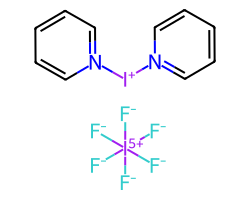

In [74]:
mol

### Custom Standardization

The RdKit `MolStandardize` module has a variey of different standardization options:

https://www.rdkit.org/docs/source/rdkit.Chem.MolStandardize.rdMolStandardize.html

https://github.com/rdkit/rdkit/blob/master/Docs/Notebooks/MolStandardize.ipynb


Here are a few examples:


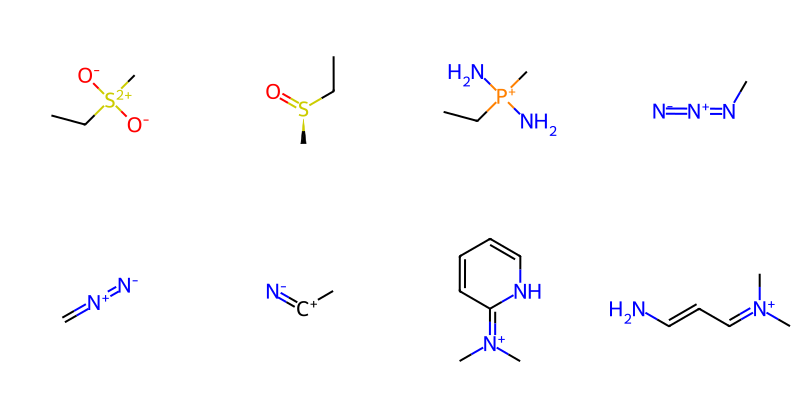

In [75]:
# Normalize functional groups
# Adapted from: https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb

# without MolStandardize
smis = ('C[S+2]([O-])([O-])CC','CC[S@](=O)C','C[P+](CC)(N)N','CN=N#N','C=N#N','[N-]=[C+]C','[nH]1c(=[N+](C)C)cccc1','NC=C-C=[N+](C)C')
mols = [Chem.MolFromSmiles(smi) for smi in smis]
Draw.MolsToGridImage(mols, molsPerRow=4)

[08:37:56] Initializing Normalizer
[08:37:56] Running Normalizer
[08:37:56] Rule applied: Sulfone to S(=O)(=O)
[08:37:56] Initializing Normalizer
[08:37:56] Running Normalizer
[08:37:56] Rule applied: Sulfoxide to -S+(O-)-
[08:37:56] Initializing Normalizer
[08:37:56] Running Normalizer
[08:37:56] Rule applied: P+N to P=N+
[08:37:56] Initializing Normalizer
[08:37:56] Running Normalizer
[08:37:56] Initializing Normalizer
[08:37:56] Running Normalizer
[08:37:56] Initializing Normalizer
[08:37:56] Running Normalizer
[08:37:56] Rule applied: Charge recombination
[08:37:56] Initializing Normalizer
[08:37:56] Running Normalizer
[08:37:56] Rule applied: Normalize 1,3 conjugated cation
[08:37:56] Initializing Normalizer
[08:37:56] Running Normalizer
[08:37:56] Rule applied: Normalize 1,5 conjugated cation


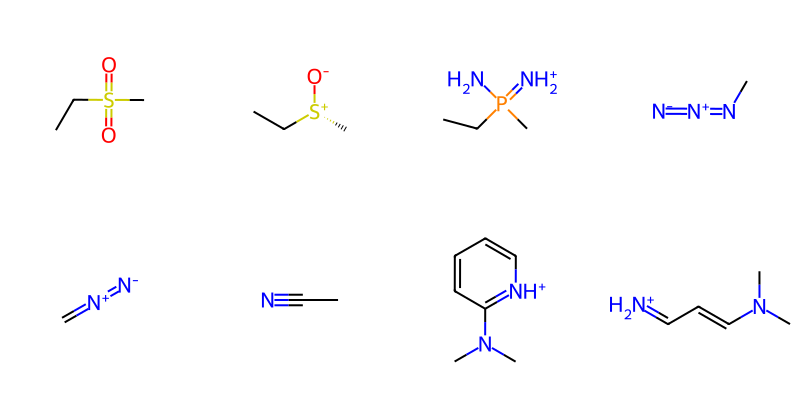

In [76]:
# with MolStandardize Normalize
from rdkit.Chem.MolStandardize import rdMolStandardize

# function to normalize functional groups
def norm_fgs(mol):
    std_mol = rdMolStandardize.Normalize(mol)
    return std_mol

std_mols =[]
for mol in mols:
    std_mols.append(norm_fgs(mol))
Draw.MolsToGridImage(std_mols, molsPerRow=4)

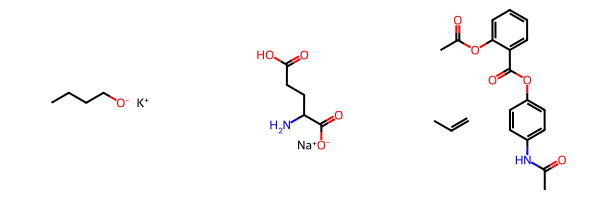

In [77]:
# Get largest fragment
smis = ['[K+].CCCC[O-]','[Na+].NC(CCC(O)=O)C([O-])=O','CC=C.CC(=O)NC1=CC=C(OC(=O)C2=CC=CC=C2OC(C)=O)C=C1']
mols = [Chem.MolFromSmiles(smi) for smi in smis]
Draw.MolsToGridImage(mols, molsPerRow=3)

[08:37:56] Running LargestFragmentChooser
[08:37:56] Fragment: [K+]
[08:37:56] New largest fragment: [K+] (1)
[08:37:56] Fragment: CCCC[O-]
[08:37:56] New largest fragment: CCCC[O-] (14)
[08:37:56] Running LargestFragmentChooser
[08:37:56] Fragment: [Na+]
[08:37:56] New largest fragment: [Na+] (1)
[08:37:56] Fragment: NC(CCC(=O)O)C(=O)[O-]
[08:37:56] New largest fragment: NC(CCC(=O)O)C(=O)[O-] (18)
[08:37:56] Running LargestFragmentChooser
[08:37:56] Fragment: C=CC
[08:37:56] New largest fragment: C=CC (9)
[08:37:56] Fragment: CC(=O)Nc1ccc(OC(=O)c2ccccc2OC(C)=O)cc1
[08:37:56] New largest fragment: CC(=O)Nc1ccc(OC(=O)c2ccccc2OC(C)=O)cc1 (38)


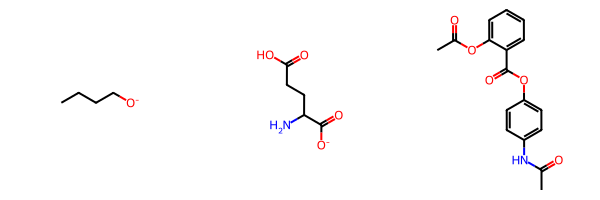

In [78]:
# function to get largest fragment
def large_frag(mol):
    lfc = rdMolStandardize.LargestFragmentChooser()
    lf_mol = lfc.choose(mol)
    return lf_mol

std_mols =[]
for mol in mols:
    std_mols.append(large_frag(mol))
Draw.MolsToGridImage(std_mols, molsPerRow=3)

[08:37:56] Running LargestFragmentChooser
[08:37:56] Fragment: [K+]
[08:37:56] New largest fragment: [K+] (1)
[08:37:56] Fragment: CCCC[O-]
[08:37:56] New largest fragment: CCCC[O-] (14)
[08:37:56] Running Uncharger
[08:37:56] Removed negative charge.
[08:37:56] Running LargestFragmentChooser
[08:37:56] Fragment: [Na+]
[08:37:56] New largest fragment: [Na+] (1)
[08:37:56] Fragment: NC(CCC(=O)O)C(=O)[O-]
[08:37:56] New largest fragment: NC(CCC(=O)O)C(=O)[O-] (18)
[08:37:56] Running Uncharger
[08:37:56] Removed negative charge.
[08:37:56] Running LargestFragmentChooser
[08:37:56] Fragment: C=CC
[08:37:56] New largest fragment: C=CC (9)
[08:37:56] Fragment: CC(=O)Nc1ccc(OC(=O)c2ccccc2OC(C)=O)cc1
[08:37:56] New largest fragment: CC(=O)Nc1ccc(OC(=O)c2ccccc2OC(C)=O)cc1 (38)
[08:37:56] Running Uncharger


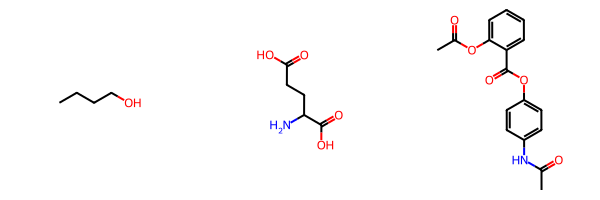

In [79]:
# Get largest fragement and neutralize the largest fragment
# function to get largest neutral fragment
def large_frag_neutral(mol):
    lfc = rdMolStandardize.LargestFragmentChooser()
    uncharger = rdMolStandardize.Uncharger()
    # get largest fragment
    lf_mol = lfc.choose(mol)

    # neutralize
    lf_mol_U = uncharger.uncharge(lf_mol)
    return lf_mol_U

std_mols =[]
for mol in mols:
    std_mols.append(large_frag_neutral(mol))
Draw.MolsToGridImage(std_mols, molsPerRow=3)


In [80]:
# Detect unwanted atoms
# Eliminate organometallic mols
# adapted from: https://github.com/rdkit/rdkit/blob/master/Docs/Notebooks/MolStandardize.ipynb
allowed_atoms = ['H','B', 'C', 'Si', 'N', 'P', 'As', 'O', 'S', 'Se', 'Te', 'F', 'Cl','Br','I']
allowed_atomic_numbers = [1, 5, 6, 14, 7, 15, 33, 8, 16, 34, 52, 9, 17, 35, 53]

In [81]:
from rdkit.Chem.rdchem import Atom
#vm = rdMolStandardize.MolVSValidation()

# Only return the mol if it is organic
def organic_mol(mol):
   allowed_atomic_numbers = [1, 5, 6, 14, 7, 15, 33, 8, 16, 34, 52, 9, 17, 35, 53]
   allowed_atoms = [Atom(i) for i in allowed_atomic_numbers]
   vm = rdMolStandardize.AllowedAtomsValidation(allowed_atoms)

   # validate mol
   msg = vm.validate(mol) # returns a message is not allowed
   if msg:
      print(msg)
      return None
   else:
      return mol

In [82]:
# test
smi = "CC(=O)CCCCF.[Mg+]"
mol = Chem.MolFromSmiles(smi)
x = organic_mol(mol)

['INFO: [AllowedAtomsValidation] Atom Mg is not in allowedAtoms list']


In [83]:
x == None

True

In [84]:
smi = "CC(=O)CCCCF"
mol = Chem.MolFromSmiles(smi)
y = organic_mol(mol) # returns the mol if True

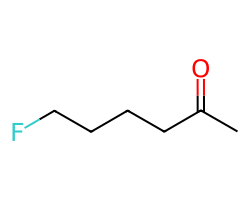

In [85]:
y

### Duplicate Molecules

We can check for duplicates molecules with canonical SMILES or InChI

In [86]:
amines_smi = ['CCOC(=O)C1=C(N)SC=C1C1CC1','NC1=NN2C(=N1)N=C(C=C2C(F)(F)F)C1=CC=CC=C1','N[C@H](CO)[C@H](O)C1=CC=C(C=C1)[N+]([O-])=O',
              'Nc1nc2nc(cc(n2n1)C(F)(F)F)-c1ccccc1','CCOC(=O)c1c(N)scc1C1CC1']
can_smiles = []
for smi in amines_smi:
    mol = Chem.MolFromSmiles(smi)
    can_smiles.append(Chem.MolToSmiles(mol, canonical=True)) # default is true

# take the set, to get unique mols
unique_mols = set(can_smiles)
unique_mols

{'CCOC(=O)c1c(C2CC2)csc1N',
 'N[C@H](CO)[C@H](O)c1ccc([N+](=O)[O-])cc1',
 'Nc1nc2nc(-c3ccccc3)cc(C(F)(F)F)n2n1'}

### Apply Validation and Standardization Steps to a real dataset

Let's go ahead and apply a workflow to a dataset from:

Andrews, D. M.; Broad, L. M.; Edwards, P. J.; Fox, D. N. A.; Gallagher, T.; Garland, S. L.; Kidd, R.; Sweeney, J. B. The Creation and Characterisation of a National Compound Collection: The Royal Society of Chemistry Pilot. Chem. Sci. 2016, 7 (6), 3869–3878. https://doi.org/10.1039/C6SC00264A.

Here is what we will do:

1. Parse the SMILES and apply standard RDKit sanitization -- if it fails, skip that molecule
2. Select only the largest fragment and neutralize the largest fragment
3. Standardize functional groups
4. Reject any molecules (if any) with non-organic containing elements
5. Filter out any duplicate mols

In [87]:
# unzip the data
!unzip ../X_Data/Thesis_compounds_ESI.zip -d ../X_Data/

Archive:  ../X_Data/Thesis_compounds_ESI.zip
  inflating: ../X_Data/Thesis_compounds_ESI.csv  


In [88]:
# Look at first few lines of data
!head -n5 ../X_Data/Thesis_compounds_ESI.csv

InChIKey,SMILES,ChemSpider Id,Real Sample Available?,Chiral?,Stereo Controlled Synthesis?,Racemic?,IR?,1H NMR?,13C NMR?,19F NMR?,31P NMR?,11B NMR?,Full NMR Assignment?,MZ?,HRMS?,Elemental Analysis?,MP?,BP?,Optical Rotation?,Crystal Structure Data?,Biological Testing Data?,Comments,Thesis ID,Thesis Compound No,Date Added,Year Of Submission,Title,Location,Author,Author 2,University,University Code,Supervisor,Supervisor Initials,Supervisor Email,Status Of Researcher,Industrial Sponsors,Funding Agencies Acknowledged,License
FMCGSUUBYTWNDP-UHFFFAOYAT,CC(C(c1ccccc1)O)N(C)C,4221,Don't Know,Yes,Yes,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,,875,29,07/07/2014 11:47,2005,Stereoselective Conjugate Addition of Cyanide,Imperial College Central Library,Nicola Jane Convine,NJC,Imperial College London,IMP,Alan Armstrong,AA,a.armstrong@imperial.ac.uk,PhD,GSK,EPSRC,
HJORMJIFDVBMOB-UHFFFAOYAG,COc1ccc(cc1OC2CCCC2)C3CC(=O)NC3,4913,Don't Know,Yes,No,TRUE,FALS

In [89]:
# There is an issue with this supporting information csv file where some columns use newline characters
# so we need to fix that
# this is usually not necassary with data...

import csv
infile = '../X_Data/Thesis_compounds_ESI.csv'
# Replace 'output.csv' with the path where you want to save the modified file
outfile = '../X_Data/Thesis_compounds_ESI_mod.csv'

with open(infile, newline='', encoding='utf-8-sig') as infile, open(outfile, 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        # Loop through each column in the row
        for i in range(len(row)):
            # Remove newline and carriage return characters from the current column and strip any whitespace
            row[i] = row[i].replace('\n', ' ').replace('\r', '').strip()
        # Write the modified row to the new file
        writer.writerow(row)

In [90]:
# Get number of lines
!wc -l ../X_Data/Thesis_compounds_ESI_mod.csv

44431 ../X_Data/Thesis_compounds_ESI_mod.csv


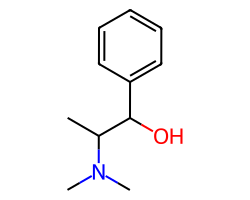

In [91]:
IPythonConsole.ipython_maxProperties = -1 # so we can see all column properties
suppl = Chem.SmilesMolSupplier('../X_Data/Thesis_compounds_ESI_mod.csv',smilesColumn=1, nameColumn=2, titleLine=True, delimiter=',')
mol1 = next(suppl)
mol1

In [92]:
# We can access the properties like this:
print(mol1.GetProp('InChIKey'))
print(mol1.GetProp('_Name'))
print(mol1.GetProp('Chiral?'))
print(mol1.GetProp('Title'))

FMCGSUUBYTWNDP-UHFFFAOYAT
4221
Yes
Stereoselective Conjugate Addition of Cyanide


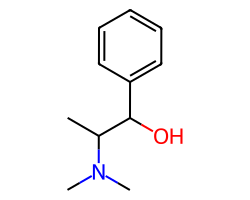

In [93]:
# Delete properties like this
mol1.ClearProp('Racemic?')

# Add properties like this
mol1.SetProp('Canonical SMILES',Chem.MolToSmiles(mol1))
mol1

In [94]:
# and loop through the file like this (just the first 20 for a demo)
count = 0
with Chem.SmilesMolSupplier('../X_Data/Thesis_compounds_ESI_mod.csv',smilesColumn=1, nameColumn=2, titleLine=True, delimiter=',') as suppl:
    for mol in suppl:
        if mol is not None: # good practice
            print(mol.GetProp('_Name'), mol.GetProp('Title'))
            count +=1
            if count >=20:
                break

4221 Stereoselective Conjugate Addition of Cyanide
4913 Stereoselective Conjugate Addition of Cyanide
7005 Stereocontrolled Synthesis and Rearrangement of Epoxides
8156 Stereocontrolled Synthesis and Rearrangement of Epoxides
12486 The Aminative Rearrangement of Dihydropyrans: A Novel Route to Substituted Proline Derivatives
13014 Stereoselective Conjugate Addition of Cyanide
13072 Stereocontrolled Synthesis and Rearrangement of Epoxides
13860 Electrophilic Amination of Heteroatoms using an Alkoxy-carbonyl Oxaziridine
15551 Stereocontrolled Synthesis and Rearrangement of Epoxides
21348 Cinchona Alkaloid-Mediated Asymmetric Synthesis of Amino Acids and Aziridines
26646 Stereocontrolled Synthesis and Rearrangement of Epoxides
56625 Stereocontrolled Synthesis and Rearrangement of Epoxides
70148 Stereoselective Conjugate Addition of Cyanide
71709 Studies Towards the Total Synthesis of FR182877
74425 Studies Towards the Total Synthesis of FR182877
88157 Cinchona Alkaloid-Mediated Asymmetric

In [95]:
# Our curation steps will generate many messages, so we will disable them for now
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [96]:
# function to get largest neutral fragment
def get_largest_neutral_frag(mol):
    lfc = rdMolStandardize.LargestFragmentChooser()
    uncharger = rdMolStandardize.Uncharger()
    # get largest fragment
    lf_mol = lfc.choose(mol)

    # neutralize
    lf_mol_U = uncharger.uncharge(lf_mol)
    return lf_mol_U

# function to normalize functional groups
def norm_fgs(mol):
    std_mol = rdMolStandardize.Normalize(mol)
    return std_mol

# fucntion to check for organic compounds
# returns TRUE if all atoms allowed (organic defined subset), returns FALSE if contains other atoms
def is_organic_mol(mol):
   allowed_atomic_numbers = [1, 5, 6, 14, 7, 15, 33, 8, 16, 34, 52, 9, 17, 35, 53]
   allowed_atoms = [Atom(i) for i in allowed_atomic_numbers]
   vm = rdMolStandardize.AllowedAtomsValidation(allowed_atoms)

   # validate mol
   msg = vm.validate(mol) # returns a message if not allowed
   if msg:
      #print(msg)
      return False
   else:
      return True

In [97]:
# This is somewhat of a large dataset at ~45,000 mols, but we should be okay with memory
# If we save mols to a dictionary
curated_mols = {}
count = 0
with Chem.SmilesMolSupplier('../X_Data/Thesis_compounds_ESI_mod.csv',smilesColumn=1, nameColumn=2, titleLine=True, delimiter=',', sanitize=True) as suppl:
    for mol in suppl:
        # 1. Parse the SMILES and apply standard RDKit sanitization -- if it fails, skip that molecule
        if mol is not None:

            # create a unique name for the dictionary keys
            name = str(count) + "_" + mol.GetProp('_Name')

            # 2. Select only the largest fragment and neutralize the largest fragment
            mol2 = large_frag_neutral(mol)

            # 3. Standardize functional groups
            mol3 = norm_fgs(mol2)

            # 4. Reject any molecules (if any) with non-organic containing elements
            if is_organic_mol(mol3) == True:
                curated_mols[name] = mol3
                count +=1

In [98]:
len(curated_mols)

44225

In [99]:
# Since we modified the molecules, I'm going to remove props
# as they may not be relevant anymore. Note that I think props
# generally get removed from modified molecules, so this may be unnecassary
# We will still have the original idx in the dictionary keys

for key,mol in curated_mols.items():
    prop_names = []
    for prop_name in mol.GetPropNames():
        prop_names.append(prop_name)

    if len(prop_names) > 0:
       for prop_name in prop_names:
           mol.ClearProp(prop_name) 

In [100]:
list(curated_mols.keys())[0]

'0_4221'

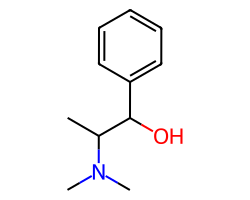

In [101]:
list(curated_mols.values())[0]

In [102]:
# Next, let's add canonical SMILES and check for duplicates
for key,mol in curated_mols.items():
    mol.SetProp('Canonical SMILES',Chem.MolToSmiles(mol)) # default is canonical


#Alternative approach

#curated_mols2 = {}
#for key,mol in curated_mols.items():
#    curated_mols2[key] = {"mol": mol,
#                         "canonical_smiles": Chem.MolToSmiles(mol)}

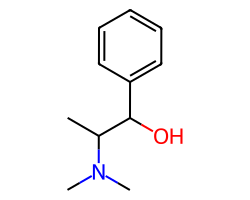

In [103]:
list(curated_mols.values())[0]

In [104]:
len(curated_mols)

44225

In [105]:
# Next, let's check and remove duplicates
# based on canonical SMILES

unique_smiles = set()
duplicates = []
for key, mol in curated_mols.items():
    canonical_smiles = mol.GetProp('Canonical SMILES')

    # Check if canonical SMILES is already present
    if canonical_smiles in unique_smiles:
        duplicates.append(key)  # Store key of duplicate
    else:
        unique_smiles.add(canonical_smiles)

# Remove duplicates from the dictionary
for key in duplicates:
    del curated_mols[key]

In [106]:
len(curated_mols)

42421

In [107]:
# re-enable logging
RDLogger.EnableLog('rdApp.*')

### Filtering: by substructure or pattern

Adapted from: https://github.com/greglandrum/AIDD_RDKit_Tutorial_2021/blob/main/RDKit_Intro.ipynb

RDKit has a convenient method to filter by a variety of predefined functional groups. These are SMARTS patterns:

https://github.com/rdkit/rdkit/blob/master/Data/Functional_Group_Hierarchy.txt

In [108]:
from rdkit import Chem
from rdkit.Chem import FunctionalGroups
_ = FunctionalGroups.BuildFuncGroupHierarchy()

# Print the names and SMARTS patterns of all functional groups
for key, value in FunctionalGroups.groupDefns.items():
    smartsPattern = value.smarts  # Access the SMARTS pattern
    print(f"{key}: {smartsPattern}")

AcidChloride: C(=O)Cl
AcidChloride.Aromatic: [$(C-!@[a])](=O)(Cl)
AcidChloride.Aliphatic: [$(C-!@[A;!Cl])](=O)(Cl)
CarboxylicAcid: C(=O)[O;H,-]
CarboxylicAcid.Aromatic: [$(C-!@[a])](=O)([O;H,-])
CarboxylicAcid.Aliphatic: [$(C-!@[A;!O])](=O)([O;H,-])
CarboxylicAcid.AlphaAmino: [$(C-[C;!$(C=[!#6])]-[N;!H0;!$(N-[!#6;!#1]);!$(N-C=[O,N,S])])](=O)([O;H,-])
SulfonylChloride: [$(S-!@[#6])](=O)(=O)(Cl)
SulfonylChloride.Aromatic: [$(S-!@c)](=O)(=O)(Cl)
SulfonylChloride.Aliphatic: [$(S-!@C)](=O)(=O)(Cl)
Amine: [N;$(N-[#6]);!$(N-[!#6;!#1]);!$(N-C=[O,N,S])]
Amine.Primary: [N;H2;D1;$(N-!@[#6]);!$(N-C=[O,N,S])]
Amine.Primary.Aromatic: [N;H2;D1;$(N-!@c);!$(N-C=[O,N,S])]
Amine.Primary.Aliphatic: [N;H2;D1;$(N-!@C);!$(N-C=[O,N,S])]
Amine.Secondary: [N;H1;D2;$(N(-[#6])-[#6]);!$(N-C=[O,N,S])]
Amine.Secondary.Aromatic: [N;H1;D2;$(N(-[c])-[#6]);!$(N-C=[O,N,S])]
Amine.Secondary.Aliphatic: [N;H1;D2;$(N(-C)-C);!$(N-C=[O,N,S])]
Amine.Tertiary: [N;H0;D3;$(N(-[#6])(-[#6])-[#6]);!$(N-C=[O,N,S])]
Amine.Tertiary.Arom

In [ ]:
# Filter by Carboxylic Acid
from rdkit.Chem import rdfiltercatalog
pattern = FunctionalGroups.groupDefns['CarboxylicAcid'].smarts
matcher = rdfiltercatalog.SmartsMatcher('CarboxylicAcid_filter', pattern, 1, 1)   # 1,1, is min, max count

In [ ]:
carboxylic_acids = []
with Chem.SmilesMolSupplier('../X_Data/Thesis_compounds_ESI_mod.csv', smilesColumn=1, nameColumn=2, titleLine=True, delimiter=',') as suppl:
    for mol in suppl:
        if mol is not None:
            if matcher.HasMatch(mol):
                carboxylic_acids.append(mol)

In [111]:
len(carboxylic_acids)

1793

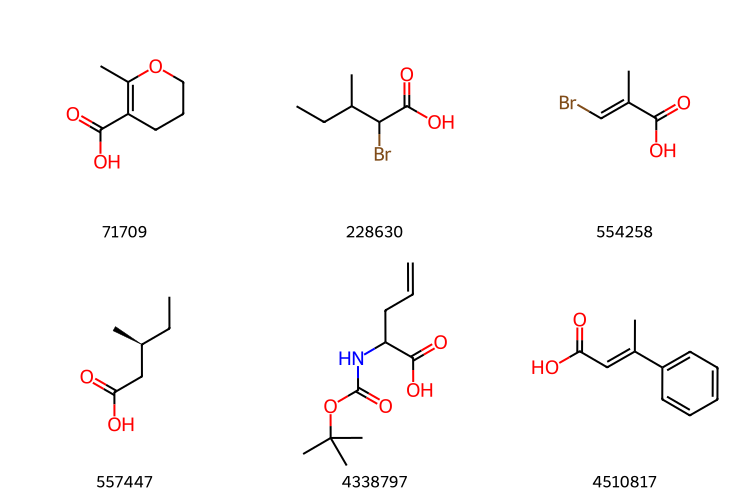

In [112]:
# View first 6 mols
mols = carboxylic_acids[:6]

mol_names = []
for mol in mols:
    mol_names.append(mol.GetProp('_Name'))
# setup the grid canvas
drawer = setup_grid(mols, num_molsPerRow=3, panel_size=250)

# draw mols
#drawer.DrawMolecules(mols, legends=[str(idx) for idx in range(len(mols))])
drawer.DrawMolecules(mols, legends=[mol_name for mol_name in mol_names])
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

In [ ]:
# We can filter by multiple Functional Groups too

pattern1 = FunctionalGroups.groupDefns['CarboxylicAcid'].smarts
matcher1 = rdfiltercatalog.SmartsMatcher('CarboxylicAcid_filter', pattern1, 1, 1)   # 1,1, is min, max count

pattern2 = FunctionalGroups.groupDefns['Halogen'].smarts
matcher2 = rdfiltercatalog.SmartsMatcher('Halogen_filter', pattern2, 1, 1)   # 1,1, is min, max count

filtered_mols = []
with Chem.SmilesMolSupplier('../X_Data/Thesis_compounds_ESI_mod.csv', smilesColumn=1, nameColumn=2, titleLine=True, delimiter=',') as suppl:
    for mol in suppl:
        if mol is not None:
            if matcher1.HasMatch(mol) and not matcher2.HasMatch(mol):
                filtered_mols.append(mol)

In [114]:
len(filtered_mols)

1627

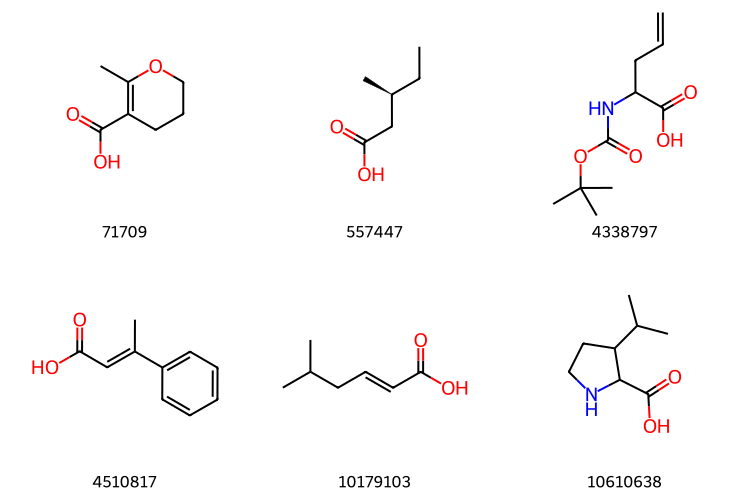

In [115]:
# View first 6 mols
mols = filtered_mols[:6]

mol_names = []
for mol in mols:
    mol_names.append(mol.GetProp('_Name'))
# setup the grid canvas
drawer = setup_grid(mols, num_molsPerRow=3, panel_size=250)

# draw mols
#drawer.DrawMolecules(mols, legends=[str(idx) for idx in range(len(mols))])
drawer.DrawMolecules(mols, legends=[mol_name for mol_name in mol_names])
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

In [ ]:
# If your FG or substructure is not pre-defined, you can also use SMILES or SMARTS directly
query = Chem.MolFromSmiles('C1CCNC1')

filtered_mols2 = []
with Chem.SmilesMolSupplier('../X_Data/Thesis_compounds_ESI_mod.csv', smilesColumn=1, nameColumn=2, titleLine=True, delimiter=',') as suppl:
    for mol in suppl:
        if mol is not None:
            if matcher1.HasMatch(mol) and not matcher2.HasMatch(mol) and not mol.HasSubstructMatch(query):
                filtered_mols2.append(mol)

In [117]:
len(filtered_mols2)

1510

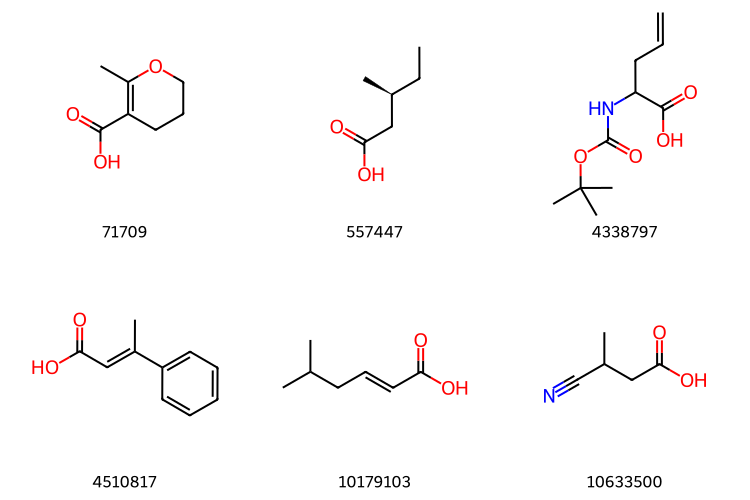

In [118]:
# View first 6 mols
mols = filtered_mols2[:6]

mol_names = []
for mol in mols:
    mol_names.append(mol.GetProp('_Name'))
# setup the grid canvas
drawer = setup_grid(mols, num_molsPerRow=3, panel_size=250)

# draw mols
#drawer.DrawMolecules(mols, legends=[str(idx) for idx in range(len(mols))])
drawer.DrawMolecules(mols, legends=[mol_name for mol_name in mol_names])
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

### Reaction Validation and Standardization

For this part, we will use a random sample of 10,000 rxns from Lowe, D. Chemical reactions from UA patents (1976-Sep2016), CC0 license: https://figshare.com/articles/dataset/Chemical_reactions_from_US_patents_1976-Sep2016_/5104873

Here is how I prepared the dataset using my terminal:

```
7z x 1976_Sep2016_USPTOgrants_smiles.7z
(head -n 1 1976_Sep2016_USPTOgrants_smiles.rsmi && tail -n +2 1976_Sep2016_USPTOgrants_smiles.rsmi | shuf -n 10000) > rxns_10k.rsmi

```

We'll do a few example rxn validation and standardization steps you might consider. For comprehensive recommendations, see: Gimadiev, T. R. et al. Mol. Inf. 2021, 40 (12), 2100119. https://doi.org/10.1002/minf.202100119.

The specific steps of rxn validation and standarization will depend on what you are trying to accomplish with downstream calculations. A good starting point would be to read the primary literature for related topics to see what curation steps were taken for your use-case.

In [119]:
rxn_data_dict = {}
col_names = ['reaction_smiles', 'PatentNumber', 'ParagraphNum', 'Year', 'TextMinedYield', 'CalculatedYield']
with open('../X_Data/rxns_10k.rsmi', 'r') as infile:
    reader = csv.DictReader(infile, delimiter='\t', fieldnames=col_names)
    # skip header
    next(reader)
    for idx,row in enumerate(reader):
        rxn_data_dict[idx] = row

In [120]:
list(rxn_data_dict.values())[0:5]

[{'reaction_smiles': '[O:1]=[C:2]1[NH:8][C:7]2[CH:9]=[C:10]([CH3:13])[CH:11]=[CH:12][C:6]=2[NH:5][CH2:4][CH:3]1[NH:14][C:15]([O:17][C:18]([CH3:21])([CH3:20])[CH3:19])=[O:16].Br[CH:23]1[CH2:28][CH2:27][CH2:26][CH:25]=[CH:24]1.C(=O)(O)[O-].[Na+]>CO>[O:1]=[C:2]1[NH:8][C:7]2[CH:9]=[C:10]([CH3:13])[CH:11]=[CH:12][C:6]=2[N:5]([CH:28]2[CH2:27][CH2:26][CH2:25][CH:24]=[CH:23]2)[CH2:4][CH:3]1[NH:14][C:15]([O:17][C:18]([CH3:21])([CH3:20])[CH3:19])=[O:16] |f:2.3|',
  'PatentNumber': 'US06239131B1',
  'ParagraphNum': '',
  'Year': '2001',
  'TextMinedYield': '',
  'CalculatedYield': '35.6%'},
 {'reaction_smiles': '[OH:1][C:2]([CH3:36])([CH3:35])[CH2:3][C@@:4]1([C:29]2[CH:34]=[CH:33][CH:32]=[CH:31][CH:30]=2)[O:9][C:8](=[O:10])[N:7]([C@H:11]([C:13]2[CH:18]=[CH:17][C:16](B3OC(C)(C)C(C)(C)O3)=[C:15]([CH3:28])[CH:14]=2)[CH3:12])[CH2:6][CH2:5]1.Br[C:38]1[CH:43]=[CH:42][N:41]([CH:44]2[CH2:46][CH2:45]2)[C:40](=[O:47])[CH:39]=1>>[CH:44]1([N:41]2[CH:42]=[CH:43][C:38]([C:16]3[CH:17]=[CH:18][C:13]([C@@H:11]([N

In [121]:
list(rxn_data_dict.keys())[0:5]

[0, 1, 2, 3, 4]

In [122]:
# Here is our example curation workflow
# Again, it's an example; you may need to adjust depending on use-case:

# I adapted some curation steps/ideas from:

# Coley, C. W.; Green, W. H.; Jensen, K. F. J. Chem. Inf. Model. 2019, 59 (6), 2529–2537. https://doi.org/10.1021/acs.jcim.9b00286.
# Genheden, S.; Norrby, P.-O.; Engkvist, O. J. Chem. Inf. Model. 2023, 63 (7), 1841–1846. https://doi.org/10.1021/acs.jcim.2c01486.
# Schneider, N.; Lowe, D. M.; Sayle, R. A.; Tarselli, M. A.; Landrum, G. A. Journal of Medicinal Chemistry 2016, 59 (9), 4385–4402. https://doi.org/10.1021/acs.jmedchem.6b00153.

# 1. Check that the rxn parses without error and sanitize
# 2. Check that all reactant, reagents, and products can be sanitized, if not, reject rxn
# 3. Move all reagents to reactants (in case there are some reagents that are mapped)
# 4. Remove solvents, catalysts, etc, (any reactants where unmapped atoms are less than 1%)
# 5. Limit to reactions where reactants > 0 and product == 1
# 6. Remove rxns where there are > 5 unmapped product atoms
# 7. Compute unmapped canonicalized rxn SMILES, so we can remove duplicates

In [123]:
# 1. Check that the rxn parses without error and sanitize

# Reject any reactions that can not be parsed or where `rdChemReactions.SanitizeRxn(rxn)` detects an issue
# The key will be our dictionary key in case we want to keep track
# returns the rxn as None if there is an issue
def check_rxn(key,smiles):
    try:
        # attempt to parse rxn
        rxn = rdChemReactions.ReactionFromSmarts(smiles, useSmiles=True)
        # attempt to sanitize rxn
        rdChemReactions.SanitizeRxn(rxn)
    except Exception as e:
        print(f"Error parsing for key: {key}, Error: {str(e)}")
        return None
    return rxn

In [124]:
# 2. Check that all reactant, reagents, and products can be sanitized, if not, reject rxn

# check sanitization of reactants, agents, and products
# returns the rxn as None if there is an issue

def check_reactants(key,rxn):
    reactants = rxn.GetReactants()
    for idx in range(len(reactants)):
       mol = reactants[idx]
       try:
           # if this works for all, return rxn
           Chem.SanitizeMol(mol)
       except:
          # if there is an exception with any, return None
            print(f"Error reactant sanitization for key: {key}")
            return None
    return rxn


def check_agents(key,rxn):
    agents = rxn.GetAgents()
    for idx in range(len(agents)):
       mol = agents[idx]
       try:
           # if this works for all, return rxn
           Chem.SanitizeMol(mol)
       except:
          # if there is an exception with any, return None
            print(f"Error agent sanitization for key: {key}")
            return None
    return rxn


def check_products(key,rxn):
    products = rxn.GetProducts()
    for idx in range(len(products)):
       mol = products[idx]
       try:
           # if this works for all, return rxn
           Chem.SanitizeMol(mol)
       except:
          # if there is an exception with any, return None
            print(f"Error product sanitization for key: {key}")
            return None
    return rxn

In [125]:
# 3. Move all reagents to reactants (in case there are some reagents that are actually mapped reactants)
def move_agents_to_reactants(rxn):

    # get the agents
    agents = rxn.GetAgents()

    if len(agents) >=1:
       for agent in agents:
          Chem.SanitizeMol(agent)

          # add agents to reactants
          rxn.AddReactantTemplate(agent)

    # delete prior agents
    rxn.RemoveAgentTemplates()
    
    # sanitize the new rxn
    rdChemReactions.SanitizeRxn(rxn)

    return rxn


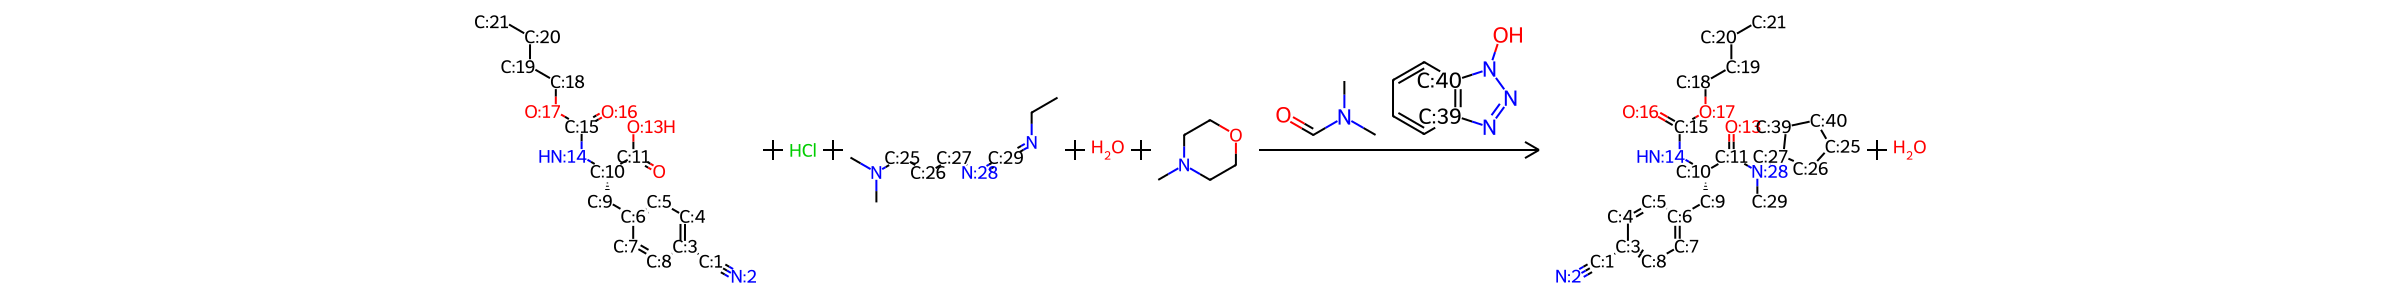

In [126]:
# modified made up rxn for an example...
rxn = rdChemReactions.ReactionFromSmarts(r'[CH3:21][CH2:20][CH2:19][CH2:18][O:17][C:15](=[O:16])[NH:14][C@@H:10]([CH2:9][C:6]1'
                                         r'=[CH:5][CH:4]=[C:3]([CH:8]=[CH:7]1)[C:1]#[N:2])[C:11]([OH:13])=O.Cl.CCN=[C:29]=[N:28][CH2:27]'
                                         r'[CH2:26][CH2:25]N(C)C.O.CN1CCOCC1>CN(C)C=O.ON1N=N[C:39]2=[C:40]1C=CC=C2>[CH3:21][CH2:20][CH2:19]'
                                         r'[CH2:18][O:17][C:15](=[O:16])[NH:14][C@@H:10]([CH2:9][C:6]1=[CH:7][CH:8]=[C:3]([CH:4]=[CH:5]1)[C:1]'
                                         r'#[N:2])[C:11](=[O:13])[N:28]([CH3:29])[CH:27]1[CH2:39][CH2:40][CH2:25][CH2:26]1.O', useSmiles=True)
rdChemReactions.SanitizeRxn(rxn)
IPythonConsole.molSize = (900,300)
rxn


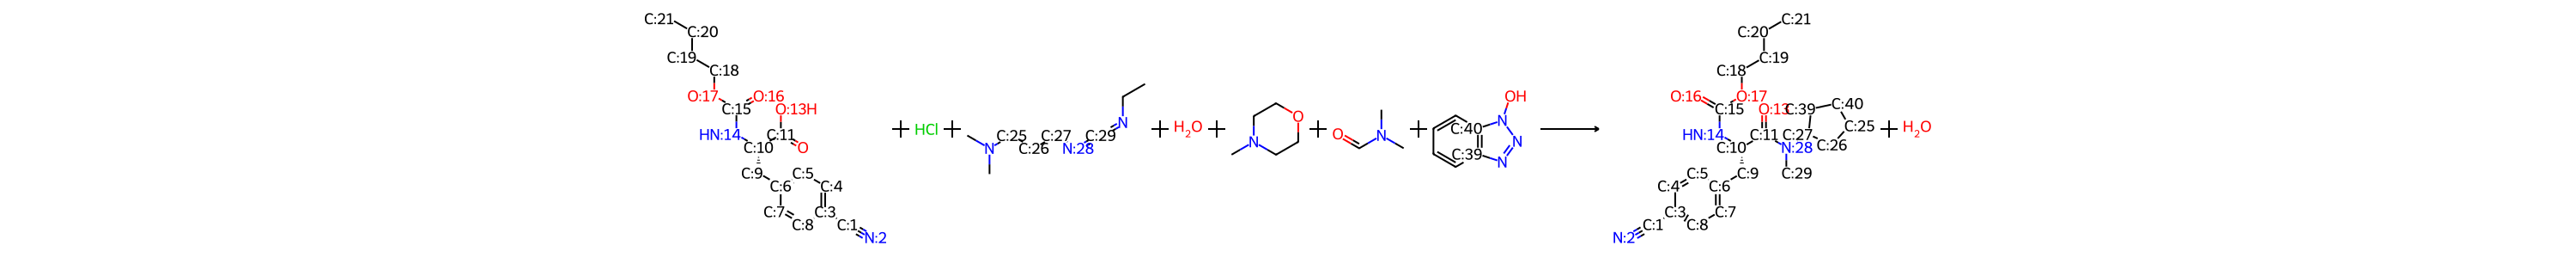

In [127]:
move_agents_to_reactants(rxn)

In [128]:
# 4. Remove solvents, catalysts, etc, (any reactants where unmapped atoms == 0)

def remove_reactant_spectators(rxn):
    
    # Default is remove if less than 20 % mapped
    # We will reduce that to less than 1% mapped, which should catch everything
    # This moves the spectators to agents
    rxn.RemoveUnmappedReactantTemplates(thresholdUnmappedAtoms=0.01)
    rxn.RemoveUnmappedProductTemplates(thresholdUnmappedAtoms=0.01)

    # now we can delete the agents
    rxn.RemoveAgentTemplates()
    
    # sanitize the new rxn
    rdChemReactions.SanitizeRxn(rxn)
    return rxn

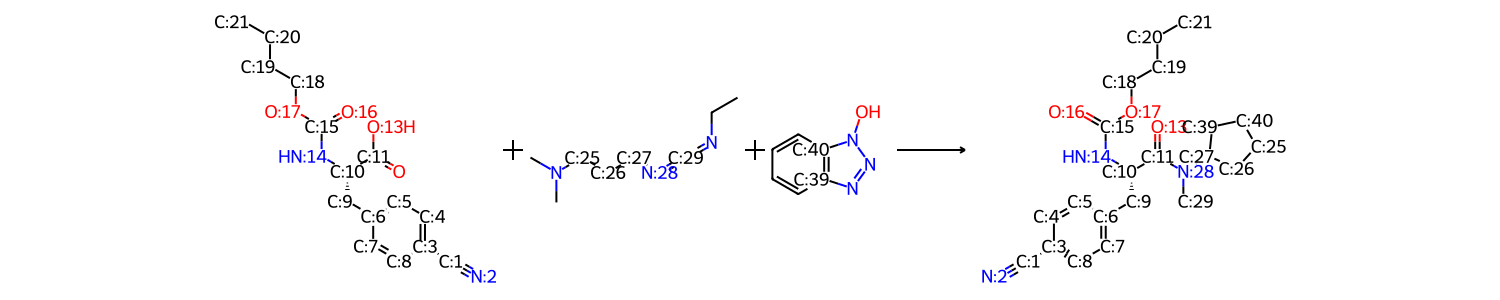

In [129]:
remove_reactant_spectators(rxn)

In [130]:
# 5. Limit to reactions where reactants > 0 and product == 1
def check_num_reactants(key,rxn):
    reactants = rxn.GetReactants()
    len_reactants = len(reactants)
    if len_reactants < 1:
        print(f"number of reactants = {str(len_reactants)} for: {key}")
    return len_reactants

def check_num_products(key,rxn):
    products = rxn.GetProducts()
    len_products = len(products)
    if len_products !=1:
       print(f"number of products = {str(len_products)} for: {key}")     
    return len_products

In [131]:
# 6. Skip rxns where there are > 5 unmapped product atoms

def check_map_prod_5(key,rxn):

    products = rxn.GetProducts()
    # we will already limit to one product
    product = products[0]
    Chem.SanitizeMol(product)

    mapped_atoms = 0
    unmapped_atoms = 0
    for atom in product.GetAtoms():
        if atom.HasProp('molAtomMapNumber'):
           mapped_atoms += 1
        else:
           unmapped_atoms +=1

    if unmapped_atoms < 5:
        return rxn
    else:
        print(f"Product unmapped atoms > 5 for: {key}")
        return None

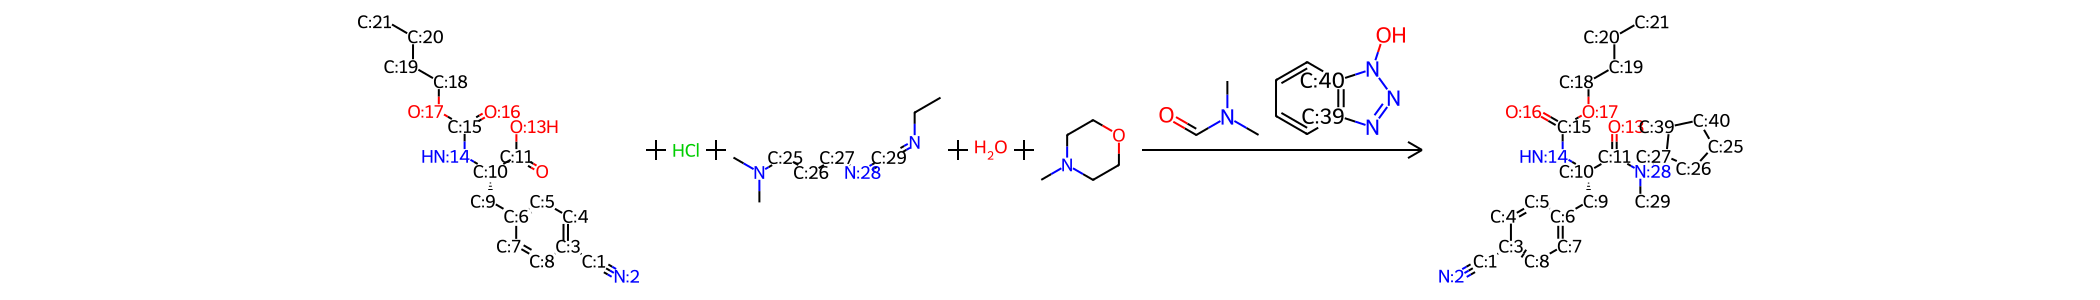

In [132]:
rxn1 = rdChemReactions.ReactionFromSmarts(r'[CH3:21][CH2:20][CH2:19][CH2:18][O:17][C:15](=[O:16])[NH:14][C@@H:10]([CH2:9][C:6]1'
                                         r'=[CH:5][CH:4]=[C:3]([CH:8]=[CH:7]1)[C:1]#[N:2])[C:11]([OH:13])=O.Cl.CCN=[C:29]=[N:28][CH2:27]'
                                         r'[CH2:26][CH2:25]N(C)C.O.CN1CCOCC1>CN(C)C=O.ON1N=N[C:39]2=[C:40]1C=CC=C2>[CH3:21][CH2:20][CH2:19]'
                                         r'[CH2:18][O:17][C:15](=[O:16])[NH:14][C@@H:10]([CH2:9][C:6]1=[CH:7][CH:8]=[C:3]([CH:4]=[CH:5]1)[C:1]'
                                         r'#[N:2])[C:11](=[O:13])[N:28]([CH3:29])[CH:27]1[CH2:39][CH2:40][CH2:25][CH2:26]1', useSmiles=True)
rdChemReactions.SanitizeRxn(rxn1)
IPythonConsole.molSize = (900,300)
rxn1

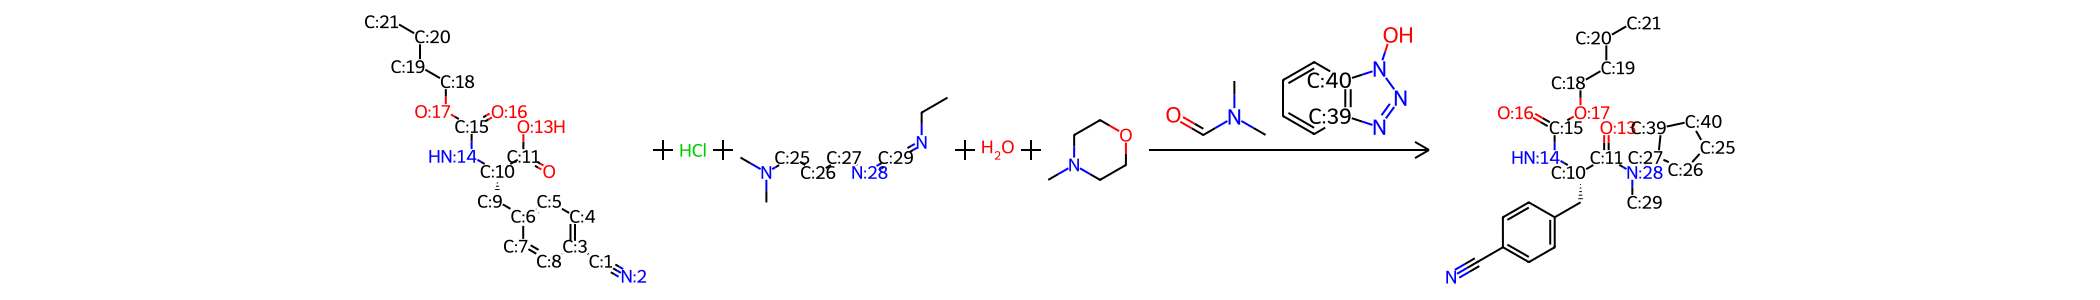

In [133]:
rxn2 = rdChemReactions.ReactionFromSmarts(r'[CH3:21][CH2:20][CH2:19][CH2:18][O:17][C:15](=[O:16])[NH:14][C@@H:10]([CH2:9][C:6]1'
                                         r'=[CH:5][CH:4]=[C:3]([CH:8]=[CH:7]1)[C:1]#[N:2])[C:11]([OH:13])=O.Cl.CCN=[C:29]=[N:28][CH2:27]'
                                         r'[CH2:26][CH2:25]N(C)C.O.CN1CCOCC1>CN(C)C=O.ON1N=N[C:39]2=[C:40]1C=CC=C2>[CH3:21][CH2:20][CH2:19]'
                                         r'[CH2:18][O:17][C:15](=[O:16])[NH:14][C@@H:10]([CH2][C]1=[CH][CH]=[C]([CH]=[CH]1)[C]'
                                         r'#[N])[C:11](=[O:13])[N:28]([CH3:29])[CH:27]1[CH2:39][CH2:40][CH2:25][CH2:26]1', useSmiles=True)
rdChemReactions.SanitizeRxn(rxn2)
IPythonConsole.molSize = (900,300)
rxn2

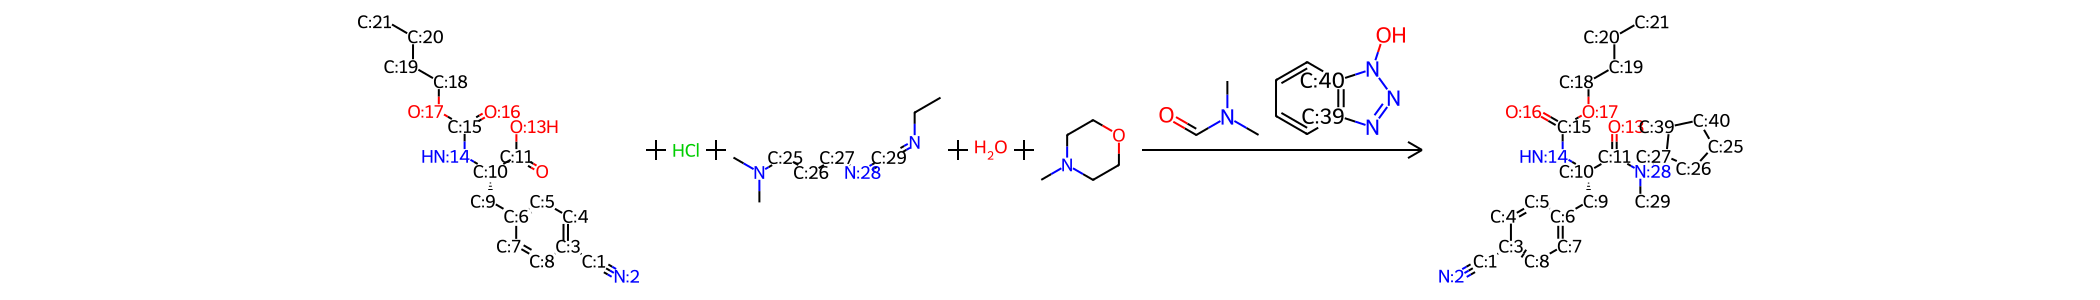

In [134]:
check_map_prod_5("test rxn1",rxn1)

In [135]:
check_map_prod_5("test rxn2",rxn2)

Product unmapped atoms > 5 for: test rxn2


In [136]:
# 7. Compute unmapped canonicalized rxn SMILES, so we can remove duplicates

def get_unmapped_canonical_smiles(rxn):
    rdChemReactions.RemoveMappingNumbersFromReactions(rxn)
    canonical_unmapped = rdChemReactions.ReactionToSmiles(rxn, canonical=True)
    return canonical_unmapped
    

In [137]:
rxn1_smi = get_unmapped_canonical_smiles(rxn1)

In [138]:
rxn2_smi = get_unmapped_canonical_smiles(rxn2)

In [139]:
rxn1_smi == rxn2_smi

True

In [140]:
# Ok, now let's put all of this together and process the 10k rxns

rxn_data_dict = {}
col_names = ['reaction_smiles', 'PatentNumber', 'ParagraphNum', 'Year', 'TextMinedYield', 'CalculatedYield']
with open('../X_Data/rxns_10k.rsmi', 'r') as infile:
    reader = csv.DictReader(infile, delimiter='\t', fieldnames=col_names)
    # skip header
    next(reader)
    for idx,row in enumerate(reader):
        rxn_data_dict[idx] = row

In [141]:
from contextlib import redirect_stdout, redirect_stderr
import copy

# Process dictionary of chemical reactions through curation workflow
# We will redirect messages to a log file for this.
with open("../X_Data/curation_log_file.txt", 'w') as outfile:
    with redirect_stdout(outfile), redirect_stderr(outfile):
        curated_rxns = {}   
        for key,value in rxn_data_dict.items():
            
            # 1. Check that the rxn parses without error and sanitize
            rxn = check_rxn(key, value["reaction_smiles"])
            if rxn is None:
                continue  # Skip if rxn is None

            # 2. Check that all reactant, reagents, and products can be sanitized
            rxn_r = check_reactants(key, rxn)
            rxn_a = check_agents(key, rxn)
            rxn_p = check_products(key, rxn)
            if None in [rxn_r, rxn_a, rxn_p]:  # If any check fails, skip that rxn
                continue

            # 3. Move all reagents to reactants (in case there are some reagents that are mapped)

            rxn3 = move_agents_to_reactants(rxn)

            # 4. Remove solvents, catalysts, etc, (any reactants where unmapped atoms are less than 1%)

            rxn4 = remove_reactant_spectators(rxn3)

            # 5. Limit to reactions where reactants > 0 and product == 1

            num_reactants = check_num_reactants(key,rxn4)
            if num_reactants < 1:
                continue

            num_products = check_num_products(key,rxn4)
            if num_products != 1:
                continue
 
            # 6. Remove rxns where there are > 5 unmapped product atoms
            rxn6 = check_map_prod_5(key,rxn4)
            if rxn6 is None:
                 continue
            
            # 7. Compute unmapped canonicalized rxn SMILES, so we can remove duplicates
            rxn6_copy = copy.deepcopy(rxn6)  # Make a deep copy of rxn6
            unmapped_canonical_smiles = get_unmapped_canonical_smiles(rxn6_copy)

            ## Now, add the modified rxns and data to a new dictionary
            curated_rxns[key] = {"canonical_smiles": rdChemReactions.ReactionToSmiles(rxn6),
                                 "unmapped_canonical_smiles": unmapped_canonical_smiles,
                                 "PatentNumber": value["PatentNumber"]}

In [142]:
len(curated_rxns)

9104

In [143]:
# Next, let's check and remove duplicate rxns based on the unmapped canonical SMILES
# based on canonical SMILES
unique = set()
duplicates = []
for key,value in curated_rxns.items():

    # Check if canonical SMILES is already present
    if value["unmapped_canonical_smiles"] in unique:
        duplicates.append(key)  # Store key of duplicate
    else:
        unique.add(value["unmapped_canonical_smiles"])

# Remove duplicates from the dictionary
for key in duplicates:
    del curated_rxns[key]

In [144]:
len(curated_rxns)

9028

In [145]:
list(curated_rxns.values())[0:5]

[{'canonical_smiles': 'Br[CH:23]1[CH:24]=[CH:25][CH2:26][CH2:27][CH2:28]1.[O:1]=[C:2]1[CH:3]([NH:14][C:15](=[O:16])[O:17][C:18]([CH3:19])([CH3:20])[CH3:21])[CH2:4][NH:5][c:6]2[c:7]([cH:9][c:10]([CH3:13])[cH:11][cH:12]2)[NH:8]1>>[O:1]=[C:2]1[CH:3]([NH:14][C:15](=[O:16])[O:17][C:18]([CH3:19])([CH3:20])[CH3:21])[CH2:4][N:5]([CH:28]2[CH:23]=[CH:24][CH2:25][CH2:26][CH2:27]2)[c:6]2[c:7]([cH:9][c:10]([CH3:13])[cH:11][cH:12]2)[NH:8]1',
  'unmapped_canonical_smiles': 'BrC1C=CCCC1.Cc1ccc2c(c1)NC(=O)C(NC(=O)OC(C)(C)C)CN2>>Cc1ccc2c(c1)NC(=O)C(NC(=O)OC(C)(C)C)CN2C1C=CCCC1',
  'PatentNumber': 'US06239131B1'},
 {'canonical_smiles': 'Br[c:38]1[cH:39][c:40](=[O:47])[n:41]([CH:44]2[CH2:45][CH2:46]2)[cH:42][cH:43]1.CC1(C)OB([c:16]2[c:15]([CH3:28])[cH:14][c:13]([C@@H:11]([N:7]3[CH2:6][CH2:5][C@:4]([CH2:3][C:2]([OH:1])([CH3:35])[CH3:36])([c:29]4[cH:30][cH:31][cH:32][cH:33][cH:34]4)[O:9][C:8]3=[O:10])[CH3:12])[cH:18][cH:17]2)OC1(C)C>>[OH:1][C:2]([CH2:3][C@:4]1([c:29]2[cH:30][cH:31][cH:32][cH:33][cH:34]2)[CH

In [146]:
####################### END OF WORKSHOP CONTENT #######################

### Self-Study/Bonus Content

In [147]:
## Molecule Validation and Standardization w/ Logging

# Returning to the example of molecule standardization of the thesis compound collection
# we may want to log any modifications and RDKit messages. Here is one way to do this:

In [148]:
# We may also want to track our changes to the molecules and any RDKit messages
# This part adapted from: https://greglandrum.github.io/rdkit-blog/posts/2024-02-23-custom-transformations-and-logging.html
# I am not very familiar with this, but it seems to work!

from rdkit import rdBase
import logging
from io import StringIO

## capture RDKit warnings
logger = logging.getLogger('rdkit')

# set the log level for the default log handler (the one which sense output to the console/notebook):
logger.handlers[0].setLevel(logging.WARN)

# Tell the RDKit's C++ backend to log to use the python logger:
rdBase.LogToPythonLogger()
logger_sio = StringIO()

# Capture RDMolStandardize messages in INFO
# create a handler that uses the StringIO and set its log level:
handler = logging.StreamHandler(logger_sio)
handler.setLevel(logging.INFO)

# add the handler to the Python logger:
logger.addHandler(handler)
logger.setLevel(logging.INFO)

In [149]:
Chem.MolFromSmiles('C1C')

[08:38:45] SMILES Parse Error: unclosed ring for input: 'C1C'


In [150]:
msg = logger_sio.getvalue()
msg

"[08:38:45] SMILES Parse Error: unclosed ring for input: 'C1C'\n"

In [151]:
# reset message
logger_sio.truncate(0)
logger_sio.seek(0)

0

In [152]:
smi = 'CC[S@](=O)C'
mol = Chem.MolFromSmiles(smi)
x = norm_fgs(mol)

In [153]:
msg = logger_sio.getvalue()
msg

'[08:38:45] Initializing Normalizer\n[08:38:45] Running Normalizer\n[08:38:45] Rule applied: Sulfoxide to -S+(O-)-\n'

In [154]:
# reset message
logger_sio.truncate(0)
logger_sio.seek(0)

0

In [ ]:
# Now implement this logging into our loop
from rdkit import rdBase
import logging
from io import StringIO

## capture RDKit warnings
logger = logging.getLogger('rdkit')
# set the log level for the default log handler (the one which sense output to the console/notebook):
logger.handlers[0].setLevel(logging.WARN)

# Tell the RDKit's C++ backend to log to use the python logger:
rdBase.LogToPythonLogger()
logger_sio = StringIO()

# Capture RDMolStandardize messages in INFO
# create a handler that uses the StringIO and set its log level:
handler = logging.StreamHandler(logger_sio)
handler.setLevel(logging.INFO)
# add the handler to the Python logger:
logger.addHandler(handler)
logger.setLevel(logging.INFO)     

count = 0
curated_mols = {}
with Chem.SmilesMolSupplier('../X_Data/Thesis_compounds_ESI_mod.csv',smilesColumn=1, nameColumn=2, titleLine=True, delimiter=',', sanitize=True) as suppl:
    for mol in suppl:
        # 1. Parse the SMILES and apply standard RDKit sanitization -- if it fails, print message
        if mol is None:
            msg = logger_sio.getvalue()
            #print(msg)    
        else:

            # create a unique name for the dictionary keys
            name = str(count) + "_" + mol.GetProp('_Name')

            # 2. Select only the largest fragment and neutralize the largest fragment
            mol2 = large_frag_neutral(mol)

            # 3. Standardize functional groups
            mol3 = norm_fgs(mol2)

            # 4. Tag any molecules (if any) with non-organic containing elements
            if is_organic_mol(mol3) == True:
                msg = logger_sio.getvalue()
                curated_mols[name] = {'mol':mol3, 'messages':msg, 'organic': True}
                count+=1
            else:
                msg = logger_sio.getvalue()
                curated_mols[name] = {'mol':mol3, 'messages':msg, 'organic': False}
                count+=1
     
        # reset msg
        logger_sio.truncate(0)
        logger_sio.seek(0)

In [156]:
len(curated_mols)

44409

In [157]:
list(curated_mols.values())[0:5]

[{'mol': <rdkit.Chem.rdchem.Mol at 0x780acafe18c0>,
  'messages': '[08:38:45] Running LargestFragmentChooser\n[08:38:45] Running Uncharger\n[08:38:45] Initializing Normalizer\n[08:38:45] Running Normalizer\n',
  'organic': True},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x780ae44b9700>,
  'messages': '[08:38:45] Running LargestFragmentChooser\n[08:38:45] Running Uncharger\n[08:38:45] Initializing Normalizer\n[08:38:45] Running Normalizer\n',
  'organic': True},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x780ae44b9770>,
  'messages': '[08:38:45] Running LargestFragmentChooser\n[08:38:45] Running Uncharger\n[08:38:45] Initializing Normalizer\n[08:38:45] Running Normalizer\n',
  'organic': True},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x780ae44b9690>,
  'messages': '[08:38:45] Running LargestFragmentChooser\n[08:38:45] Running Uncharger\n[08:38:45] Initializing Normalizer\n[08:38:45] Running Normalizer\n',
  'organic': True},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x780ae44b9620>,
  'messages': '[08:38:45] Ru

In [158]:
# Note that we can filter for certain messages like this:
# for normalization of FGs, the phrase "Rule applied" is in the INFO
# for uncharger, the word "Removed" 
# for organic atoms test, the word "AllowedAtomsValidation"

mols_with_FG_changes = {key: value for key, value in curated_mols.items() if "Rule applied" in value['messages']}
len(mols_with_FG_changes)

274

In [159]:
list(mols_with_FG_changes.values())[0:5]

[{'mol': <rdkit.Chem.rdchem.Mol at 0x780ae44b94d0>,
  'messages': '[08:38:45] Running LargestFragmentChooser\n[08:38:45] Running Uncharger\n[08:38:45] Initializing Normalizer\n[08:38:45] Running Normalizer\n[08:38:45] Rule applied: Sulfoxide to -S+(O-)-\n',
  'organic': True},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x780ae449e420>,
  'messages': '[08:38:46] Running LargestFragmentChooser\n[08:38:46] Running Uncharger\n[08:38:46] Initializing Normalizer\n[08:38:46] Running Normalizer\n[08:38:46] Rule applied: Sulfoxide to -S+(O-)-\n',
  'organic': True},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x780ae44898c0>,
  'messages': '[08:38:46] Running LargestFragmentChooser\n[08:38:46] Running Uncharger\n[08:38:46] Initializing Normalizer\n[08:38:46] Running Normalizer\n[08:38:46] Rule applied: Sulfoxide to -S+(O-)-\n',
  'organic': True},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x780ae44892a0>,
  'messages': '[08:38:46] Running LargestFragmentChooser\n[08:38:46] Running Uncharger\n[08:38:46] Initializing No

In [160]:
## And then, do any further filtering (e.g., remove non-organic mols) and analysis (e.g., add canonical SMILES to check for duplicates later)
curated_mols_organic = {}
for key,value in curated_mols.items():
    if value['organic'] == True:
        curated_mols_organic[key] = {"mol": value["mol"],
                                     "messages": value["messages"],
                                     "canonical_smiles": Chem.MolToSmiles(value["mol"])}
len(curated_mols_organic)

44225

In [161]:
list(curated_mols_organic.values())[0:5]

[{'mol': <rdkit.Chem.rdchem.Mol at 0x780acafe18c0>,
  'messages': '[08:38:45] Running LargestFragmentChooser\n[08:38:45] Running Uncharger\n[08:38:45] Initializing Normalizer\n[08:38:45] Running Normalizer\n',
  'canonical_smiles': 'CC(C(O)c1ccccc1)N(C)C'},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x780ae44b9700>,
  'messages': '[08:38:45] Running LargestFragmentChooser\n[08:38:45] Running Uncharger\n[08:38:45] Initializing Normalizer\n[08:38:45] Running Normalizer\n',
  'canonical_smiles': 'COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1'},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x780ae44b9770>,
  'messages': '[08:38:45] Running LargestFragmentChooser\n[08:38:45] Running Uncharger\n[08:38:45] Initializing Normalizer\n[08:38:45] Running Normalizer\n',
  'canonical_smiles': 'c1ccc(C2CO2)cc1'},
 {'mol': <rdkit.Chem.rdchem.Mol at 0x780ae44b9690>,
  'messages': '[08:38:45] Running LargestFragmentChooser\n[08:38:45] Running Uncharger\n[08:38:45] Initializing Normalizer\n[08:38:45] Running Normalizer\n',
  'canonical